# Google Data Analytics Certification Case Study

## How Can a Wellness Technology Company Play It Smart? 

This case study is used to highlight key skills gained though the Google Data Analytics Certification:


* The data analytics lifecycle: ask, prepare, process, analyze, share, and act.


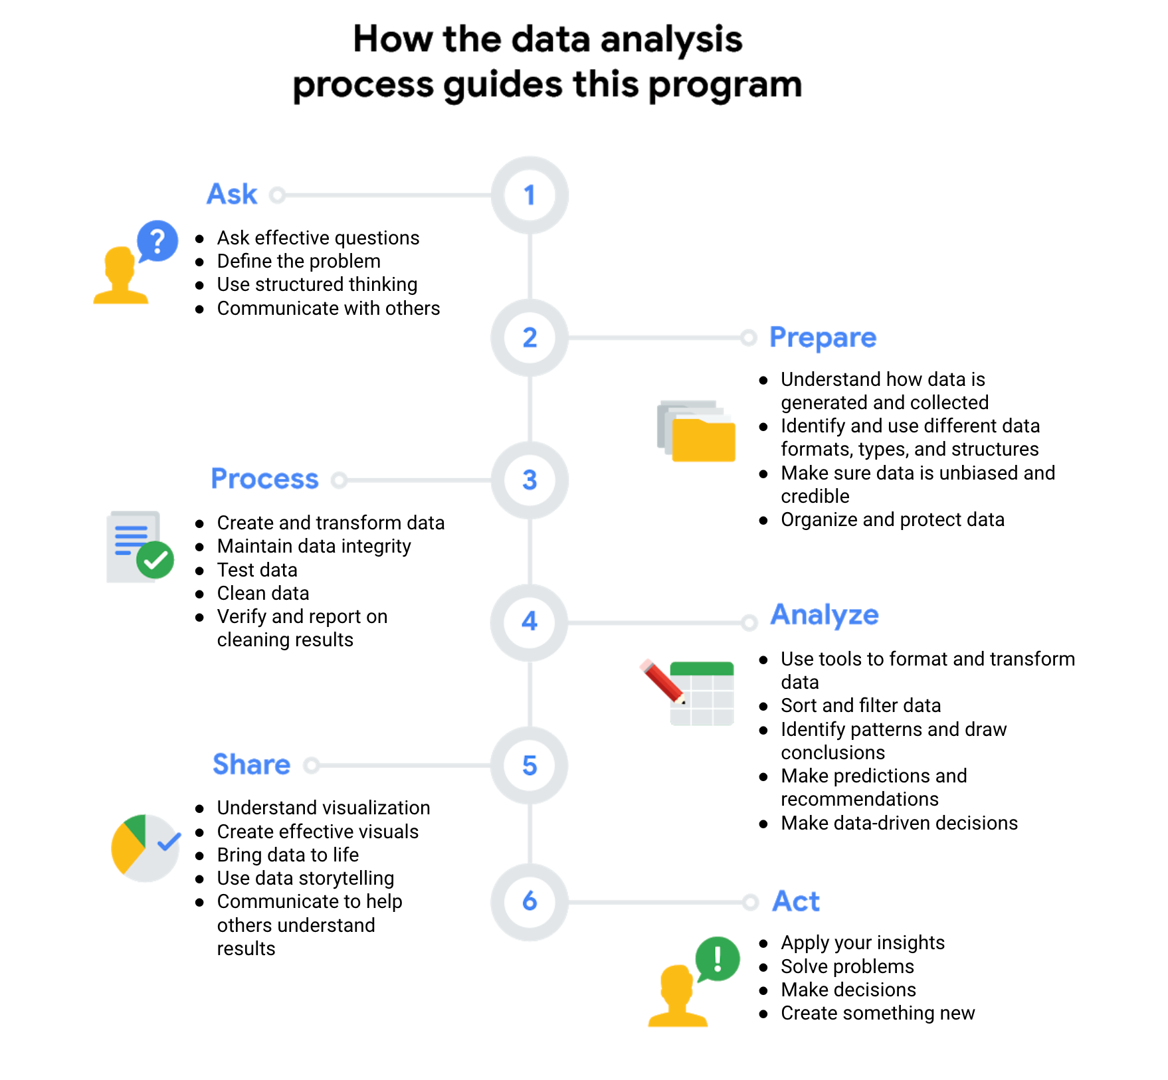


### Fictional Scenario

I am a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart  device market. Urška Sršen, co-founder and Chief Creative Officer of Bellabeat believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. 

I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights that I discover will then help guide marketing strategy for the company. I will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

### Ask

**Business Task**: Identify trends in smart device usage that could be applied to Bellabeat customers and will guide marketing strategy.

The following questions will guide my analysis:
	What are some trends in smart device usage?
	How could these trends apply to Bellabeat customers?
	How could these trends help influence Bellabeat’s marketing strategy?

My findings will be communicated with the shareholders of this task, i.e. Bellabeat marketing analytics team, and the Bellabeat executive team. 

### Prepare
**Data Sources**: The dataset used is [FitBit Fitness Tracker Data][1]. It is in the Public Domain.

[1]: https://www.kaggle.com/datasets/arashnic/fitbit

The dataset contains csv files of various metrics, including daily activity, heart rate, calories, intensity, steps, weight, and sleep data collected from 30 persons from 4/12/16 to 5/12/16. 

This is the expected dataset to be used in this case study; however, it is essential to note that the sample size of 30 persons is acceptable but low, and the data needs to be updated as it is from 2016. 

### Process

**Documentation of any cleaning or manipulation of data**: We will focus our analysis in R.  We will primarily use tools located in the tidyverse library, though additional libraries will also be used for analysis. I have saved the files locally into folders and vetted the field names to ensure that they are standardized.

In this stage I have imported the datasets into R. 

* dailyActivity_merged 
* sleepDay_merged

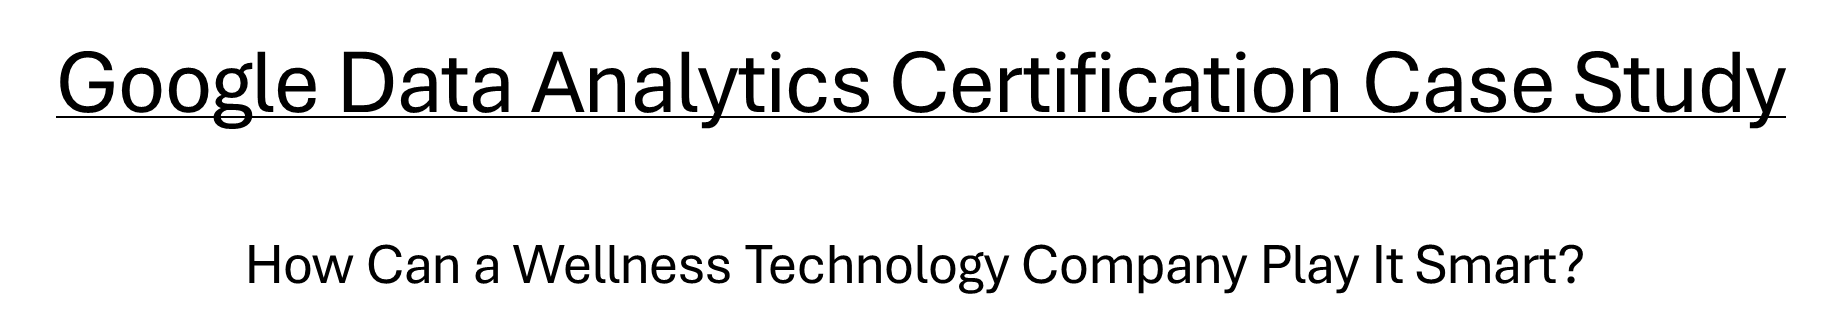
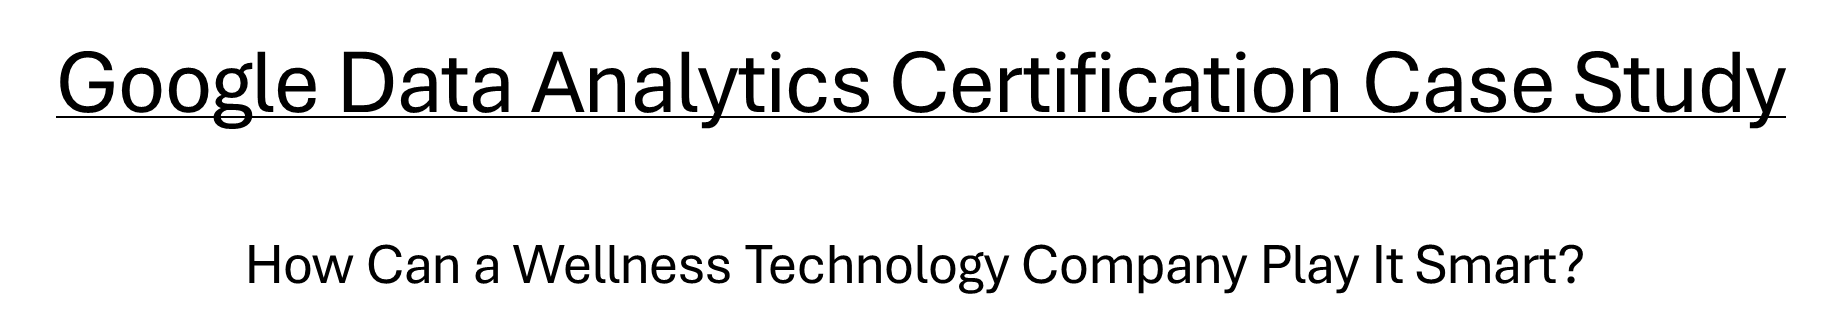
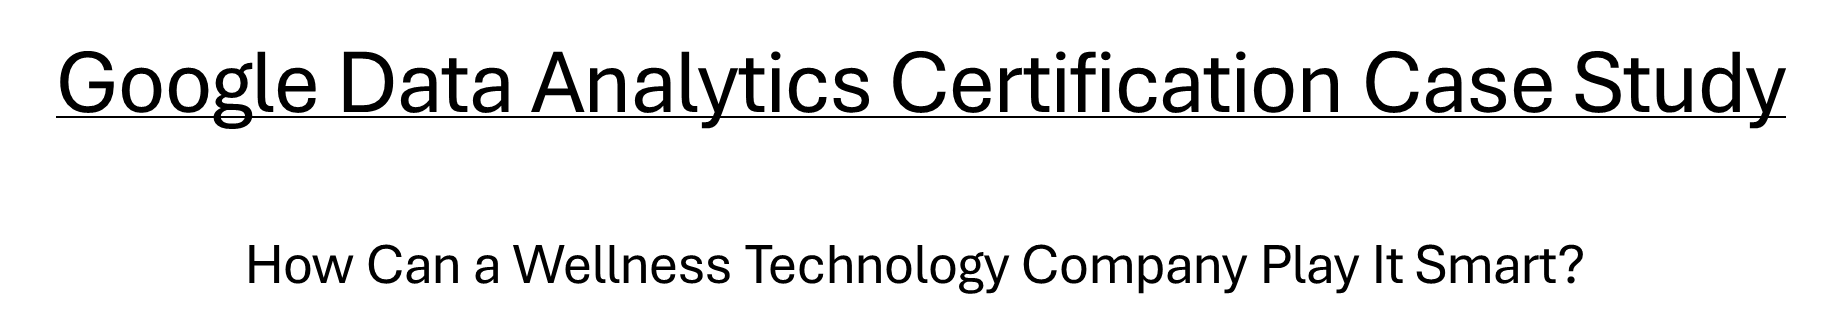
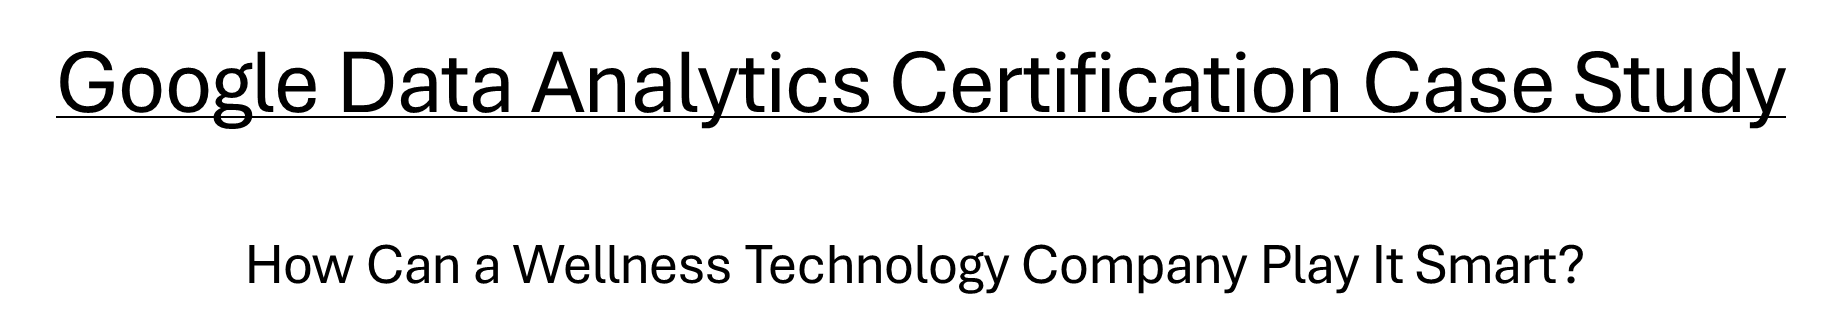
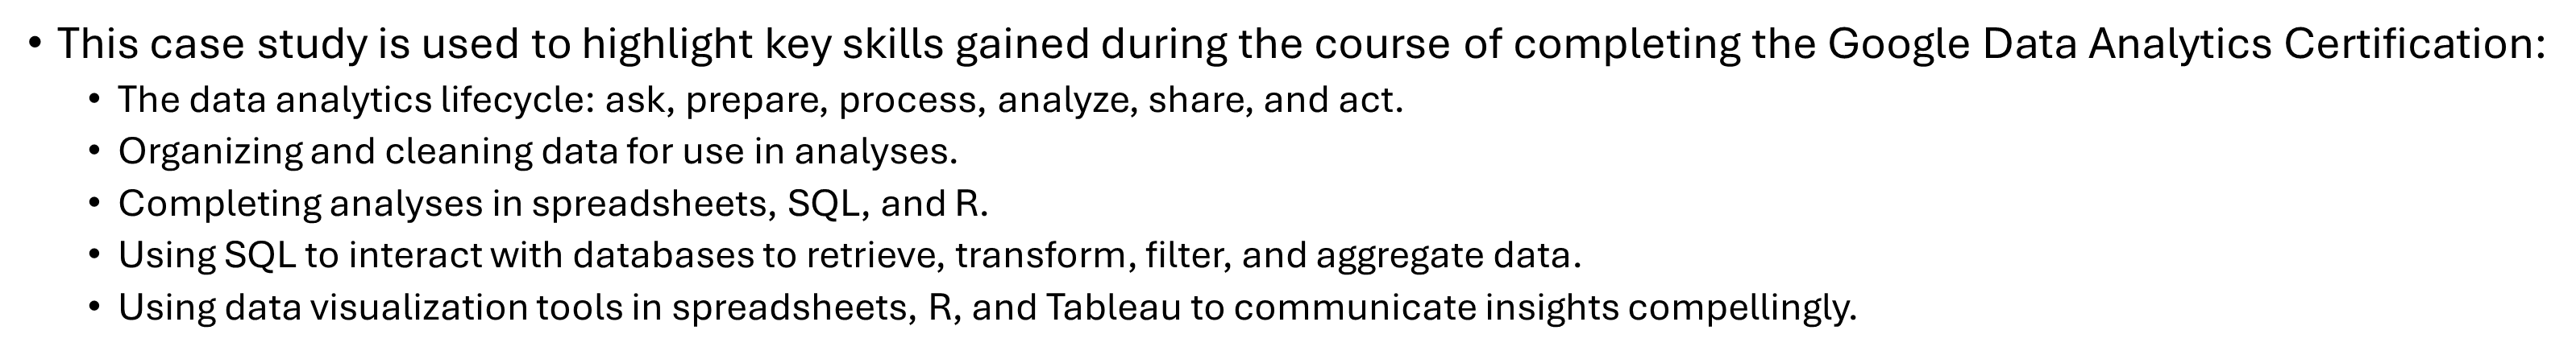
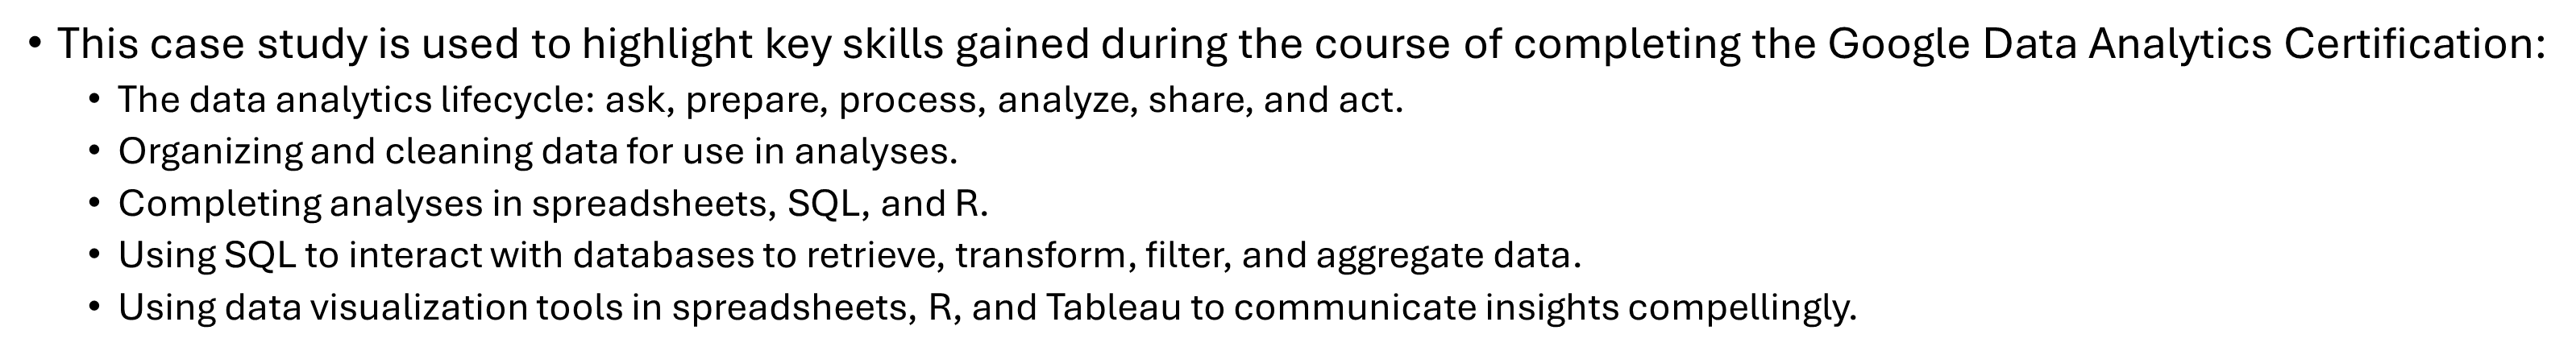
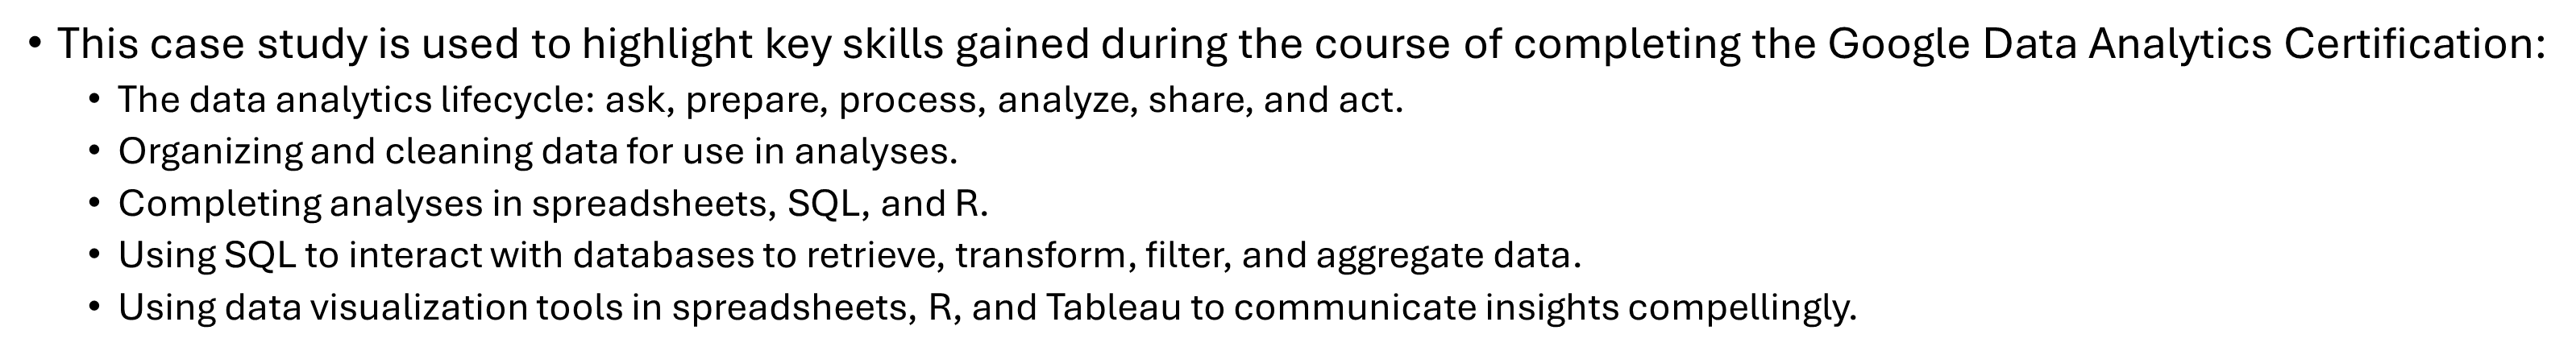
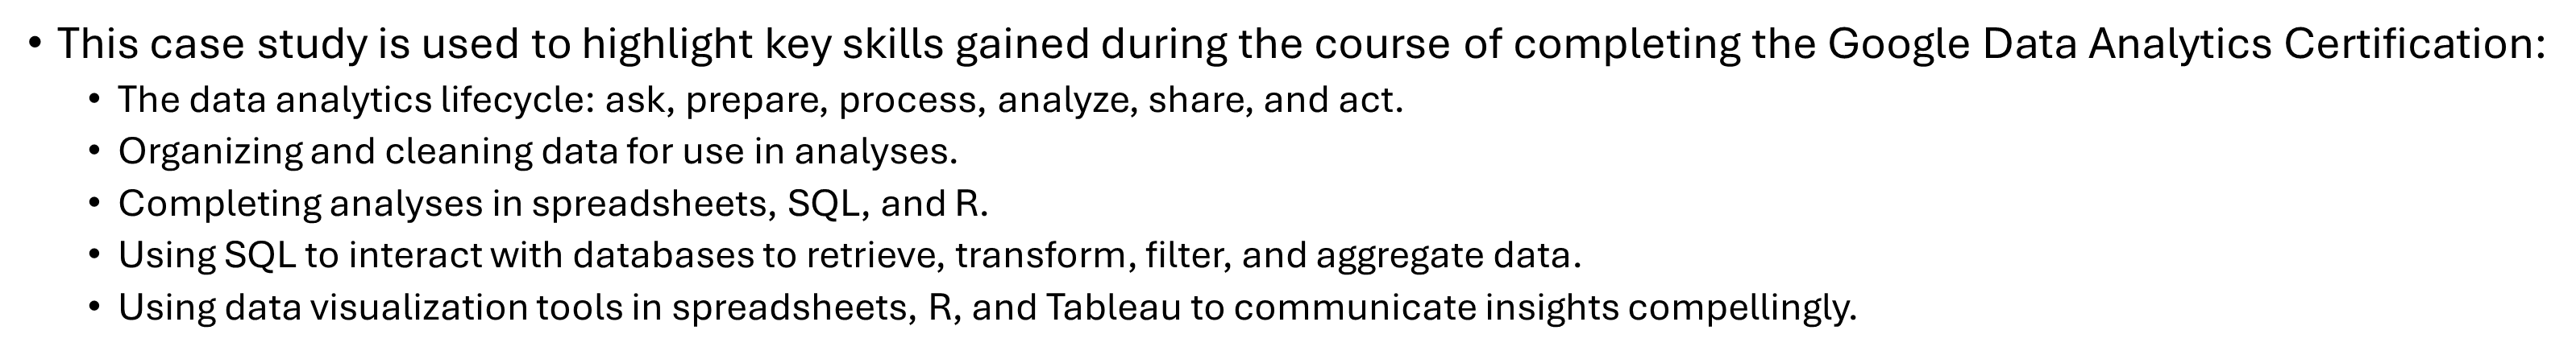
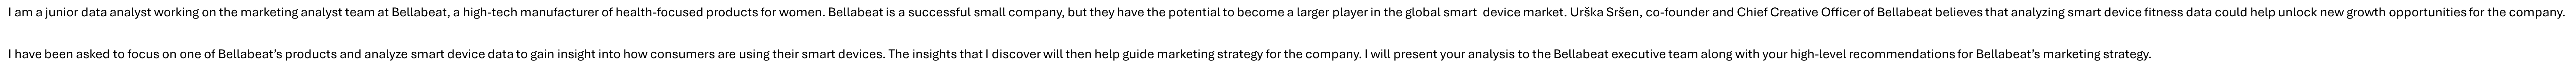
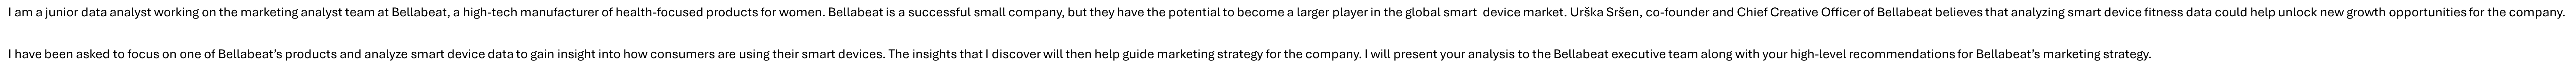
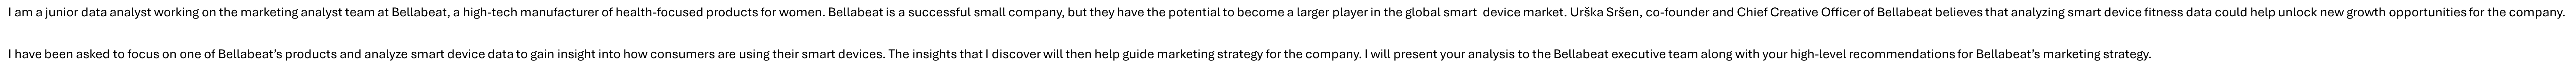
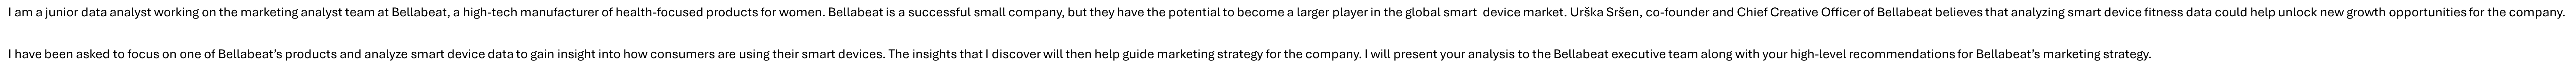
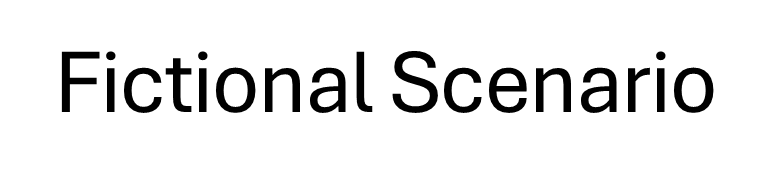
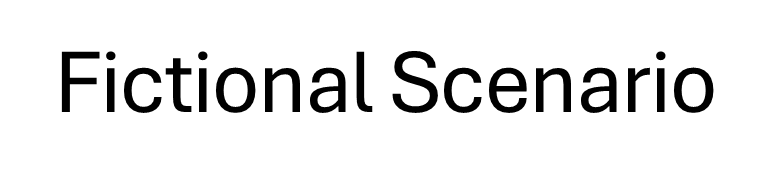
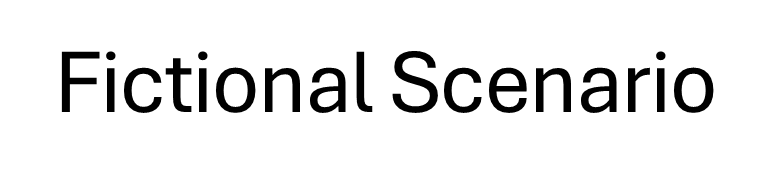
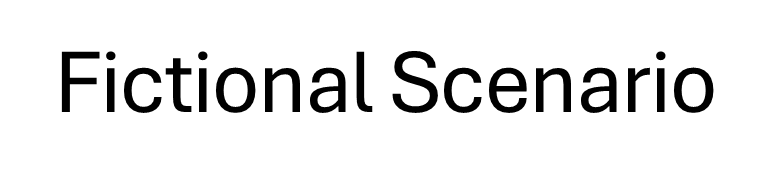
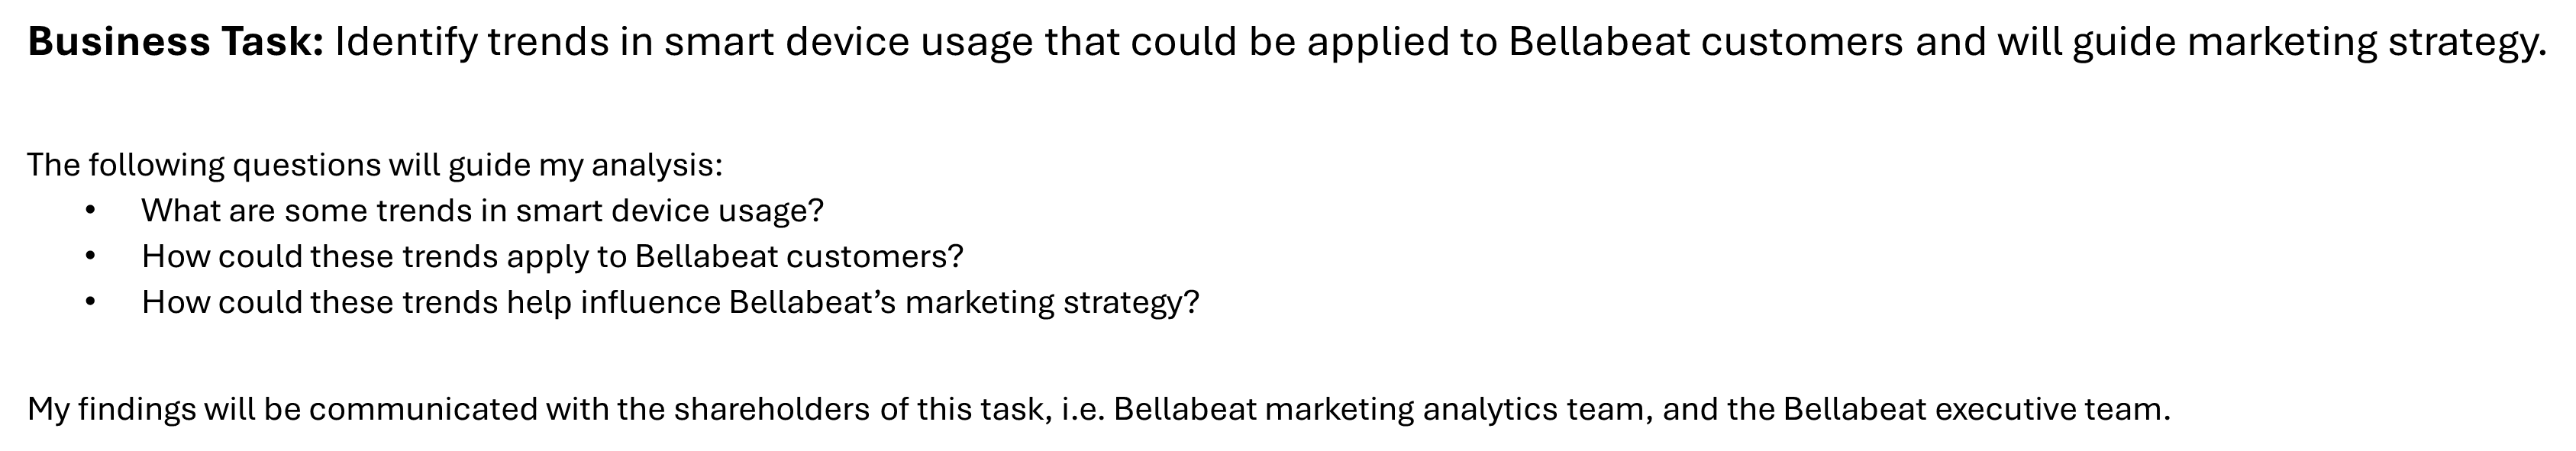
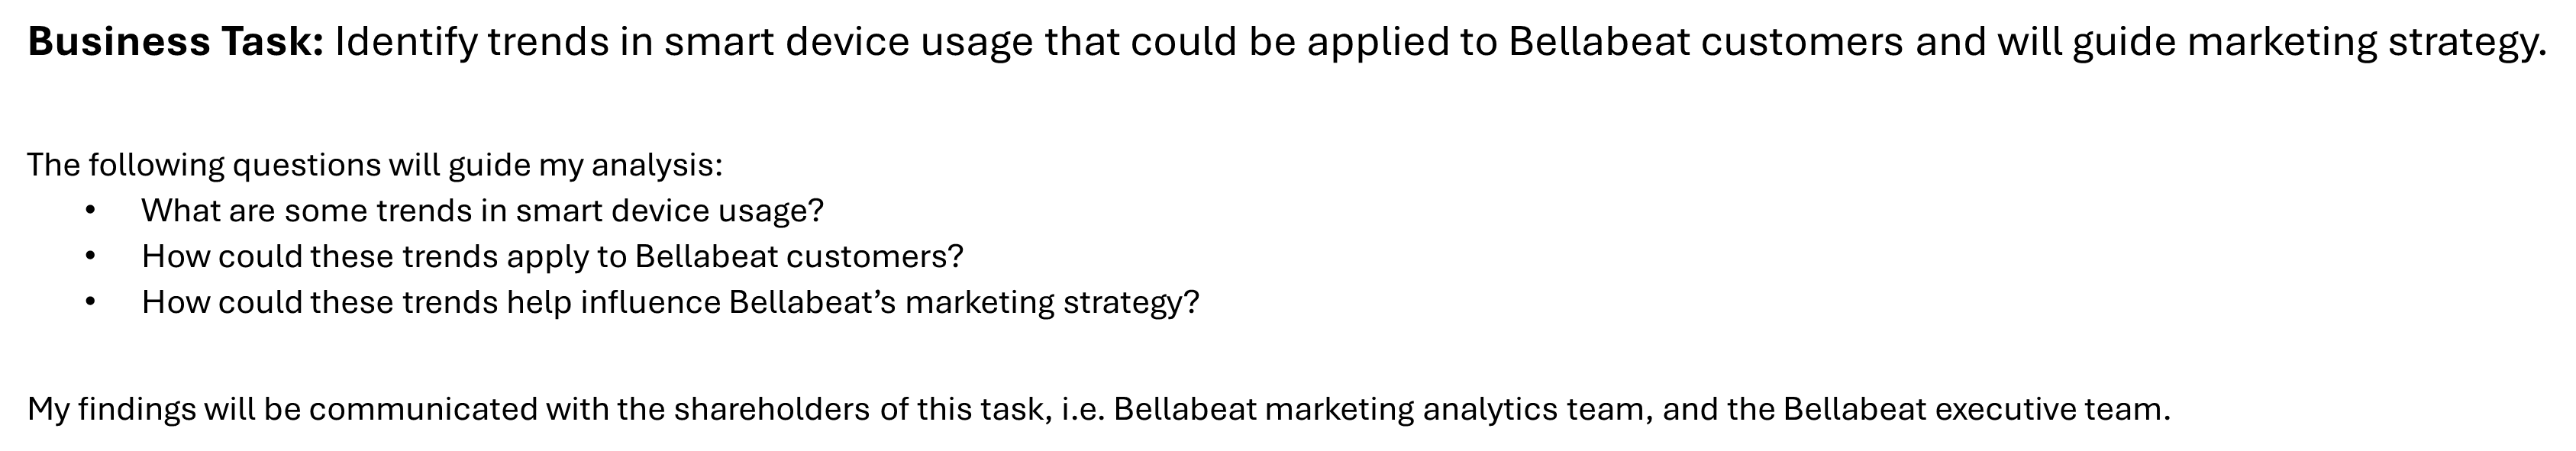
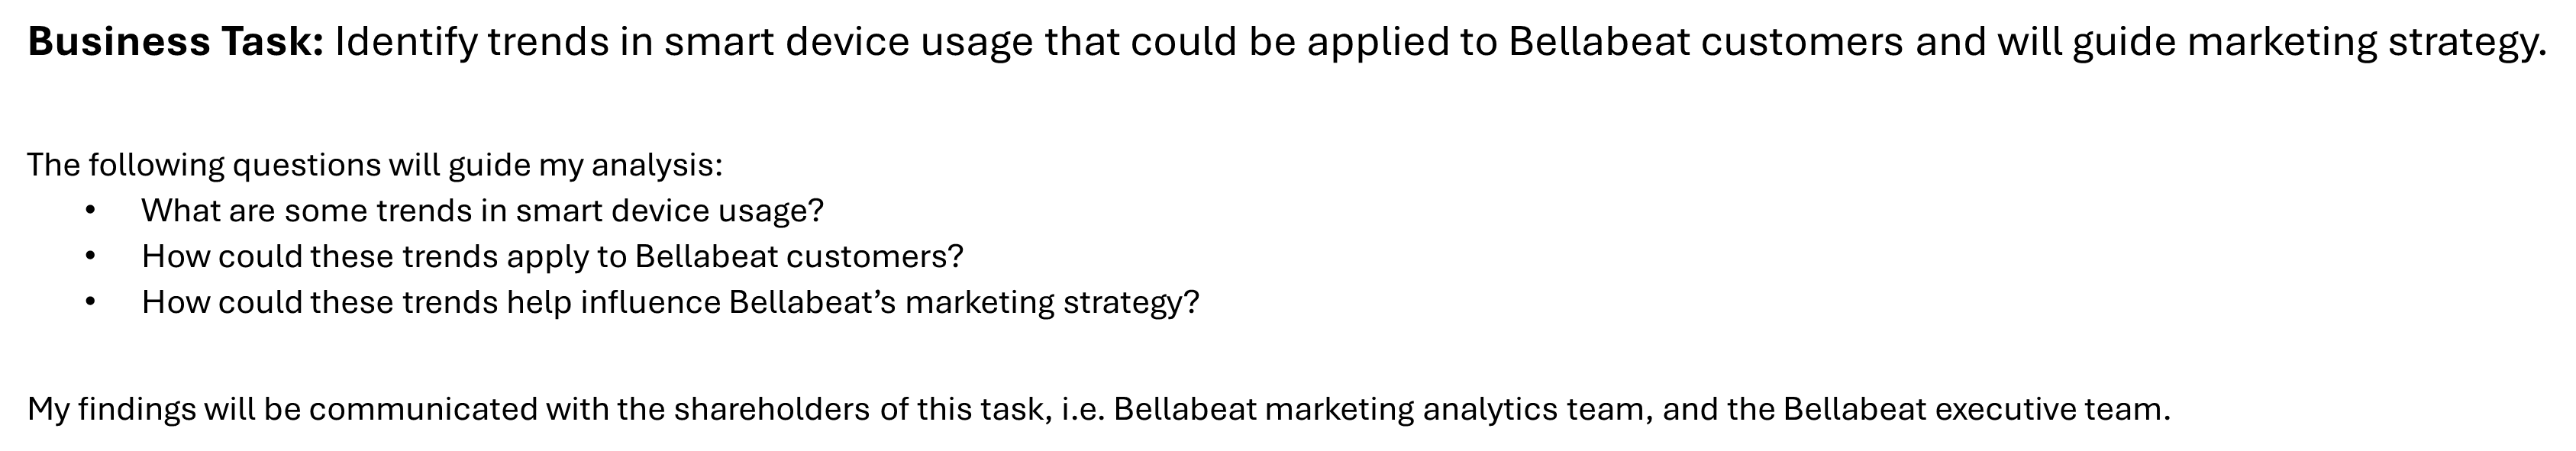
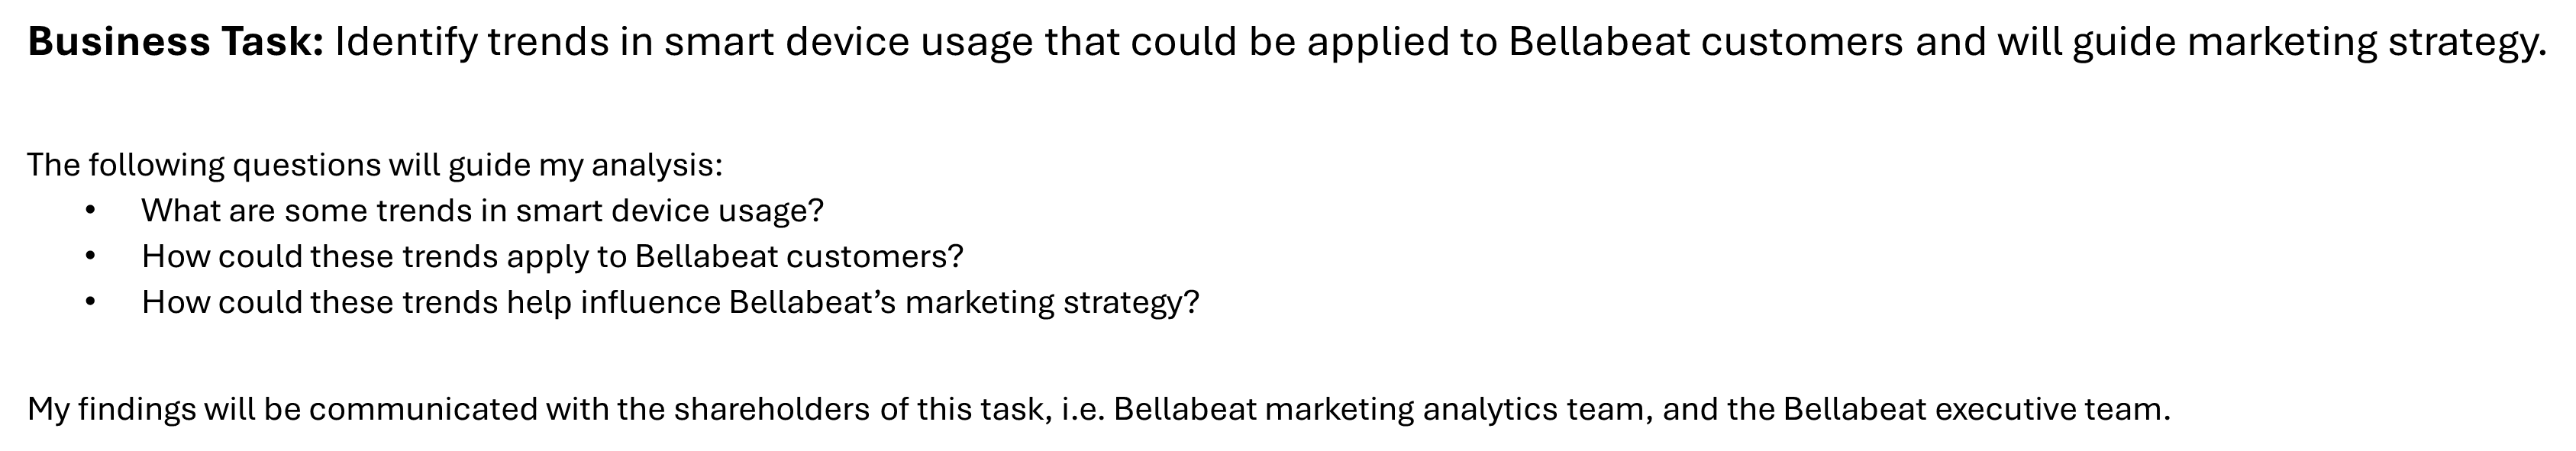
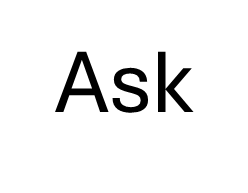
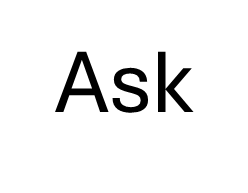
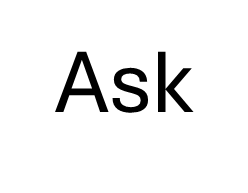
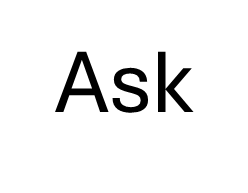
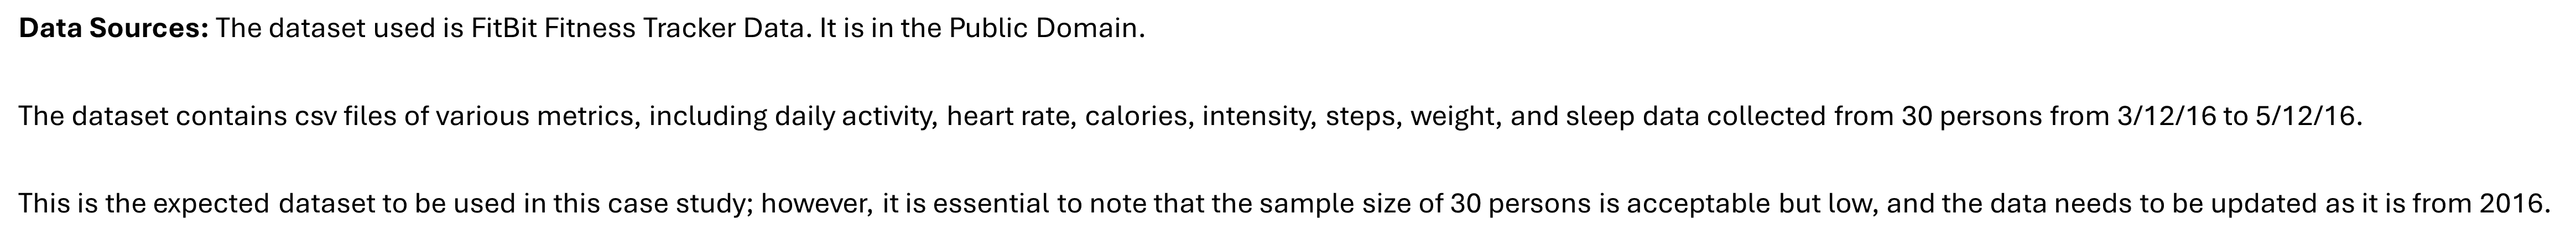
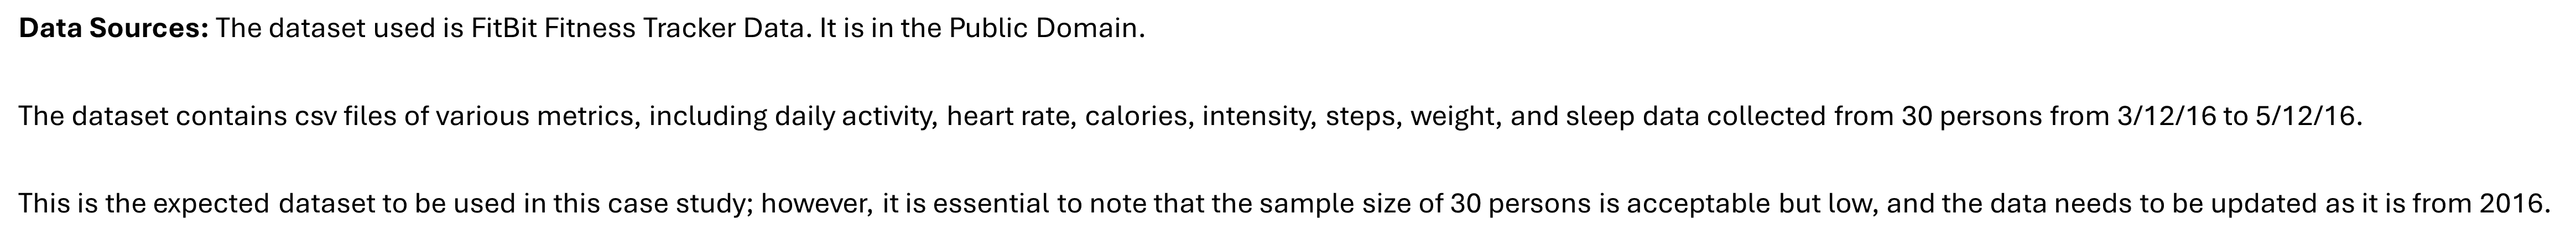
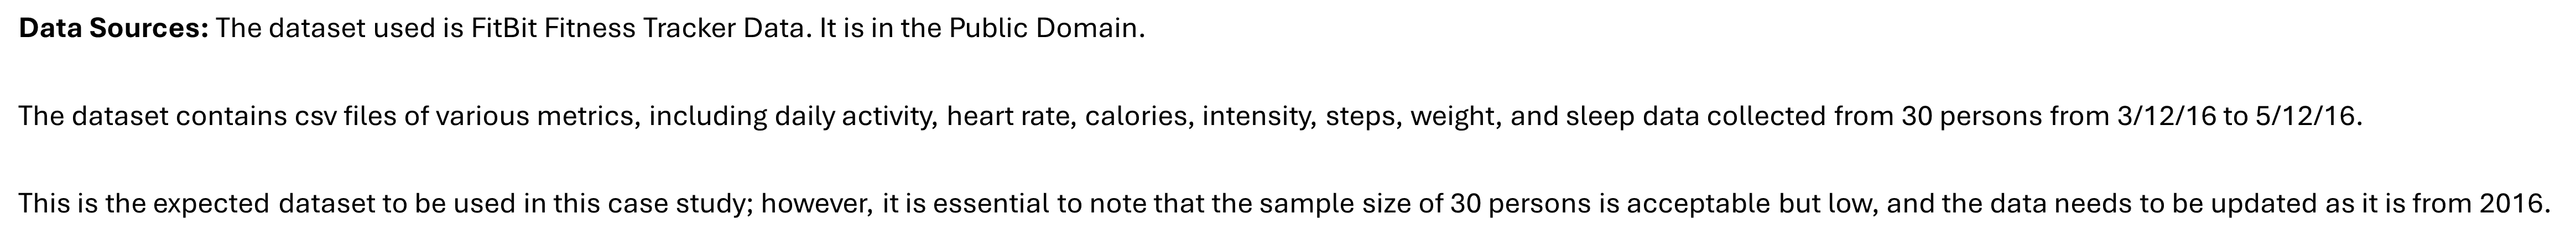
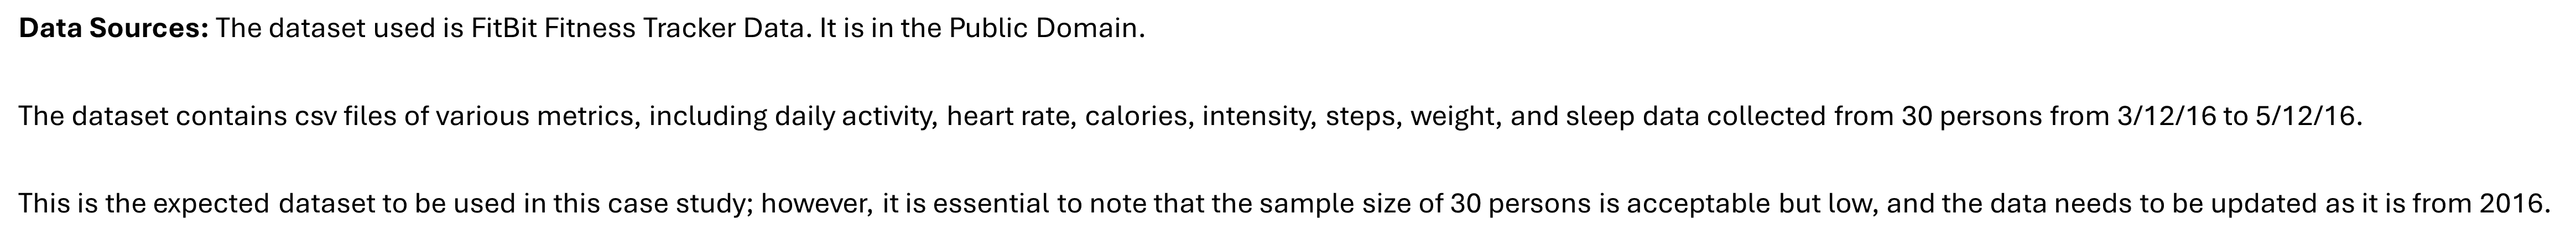
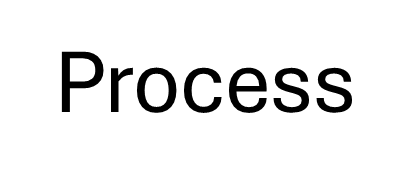
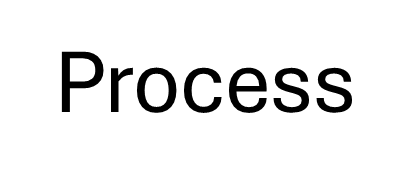
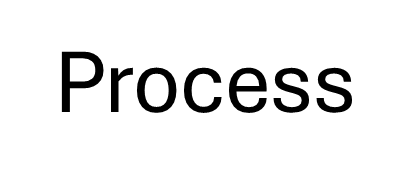
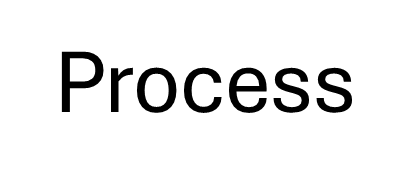
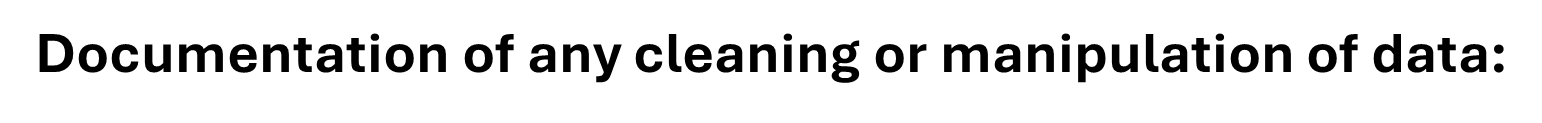
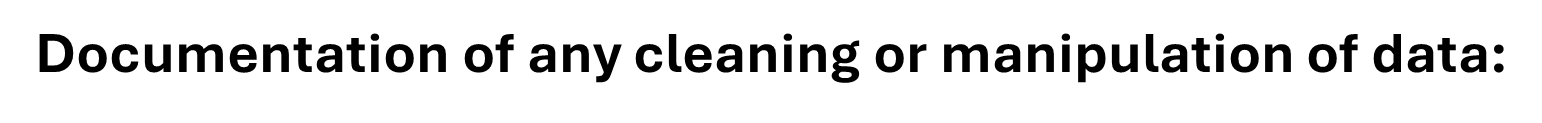
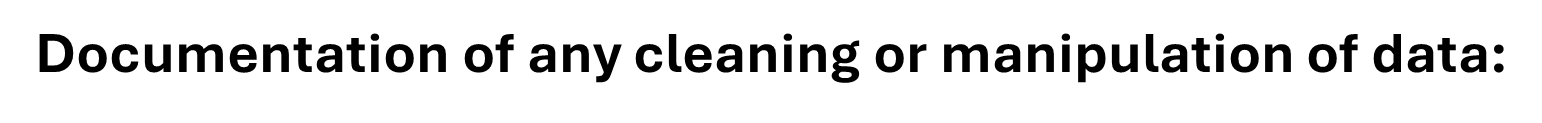
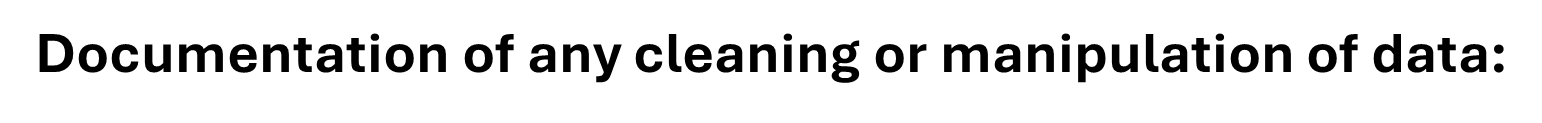

In [ ]:
daily_activity <- read.csv("...\\Bellabeat\\dailyActivity_merged.csv")
sleep_day <- read.csv("...\\Bellabeat\\sleepDay_merged.csv")

Now, I will explore the data to gain a better understanding of the current format and data types. 

In [ ]:
head(daily_activity)
colnames(daily_activity)
glimpse(daily_activity)
skim_without_charts(daily_activity)
str(daily_activity)

head(sleep_day)
colnames(sleep_day)
glimpse(sleep_day)
skim_without_charts(sleep_day)
str(sleep_day)


I have taken a look at the dataframes and determined that I should rename fields to be consistently formatted and check that each field is unique. 

In [ ]:
daily_activity<- rename_with(daily_activity, tolower)
clean_names(daily_activity)
sleep_day <- rename_with(sleep_day, tolower)
clean_names(sleep_day)

I will take a look at some summary statistics to better understand the data that I am working with.  I would like to know how many participants there were and how many observations were in each dataframe.

In [ ]:
n_distinct(daily_activity$Id)
n_distinct(sleep_day$Id)

nrow(daily_activity)
nrow(sleep_day)

I observe only 33 participants in the activity data but only 24 in the sleep data. While there are 930 observations in activity data, there are only 413 observations in sleep data. 

Lastly, I will join these tables for ease of use in analysis. I created a new worksheet in Excel using both the ID and Activity Date columns to join the data.

In [ ]:
combined_data <- read.csv("...\\Bellabeat\\combinedData.csv")
combined_data <- rename_with(combined_data, tolower)
clean_names(combined_data)
head(combined_data)
colnames(combined_data)
glimpse(combined_data)
skim_without_charts(combined_data)
str(combined_data)

## Analyze & Share

I'll take a look at a the relationship between a few different variables. 
1. I expect to see a correlation between steps taken and calories burned.
2. I would like to look at the relationship between calories and total minutes of sleep.
3. I would like to look at the relationship between total minutes of sleep and steps taken.
5. I would like to look at the relationship between total minutes of sleep and minutes of activity.
6. I would like to look at the relationship between calories and minutes of activity.

By focusing my analysis on these variables, I hope to be able to gain insight around sleep quality and daily activity.

I begin by looking at the relationship between steps taken and calories burned. I expect to see that the more steps taken, the more calories are burned.


In [ ]:
ggplot(data=daily_activity, aes(x=totalsteps, y=calories)) + 
	geom_point() + 
	geom_smooth(method="loess") +
	ggtitle("Calories vs Total Steps") + 
	labs(x= "Total Steps", y = "Calories")


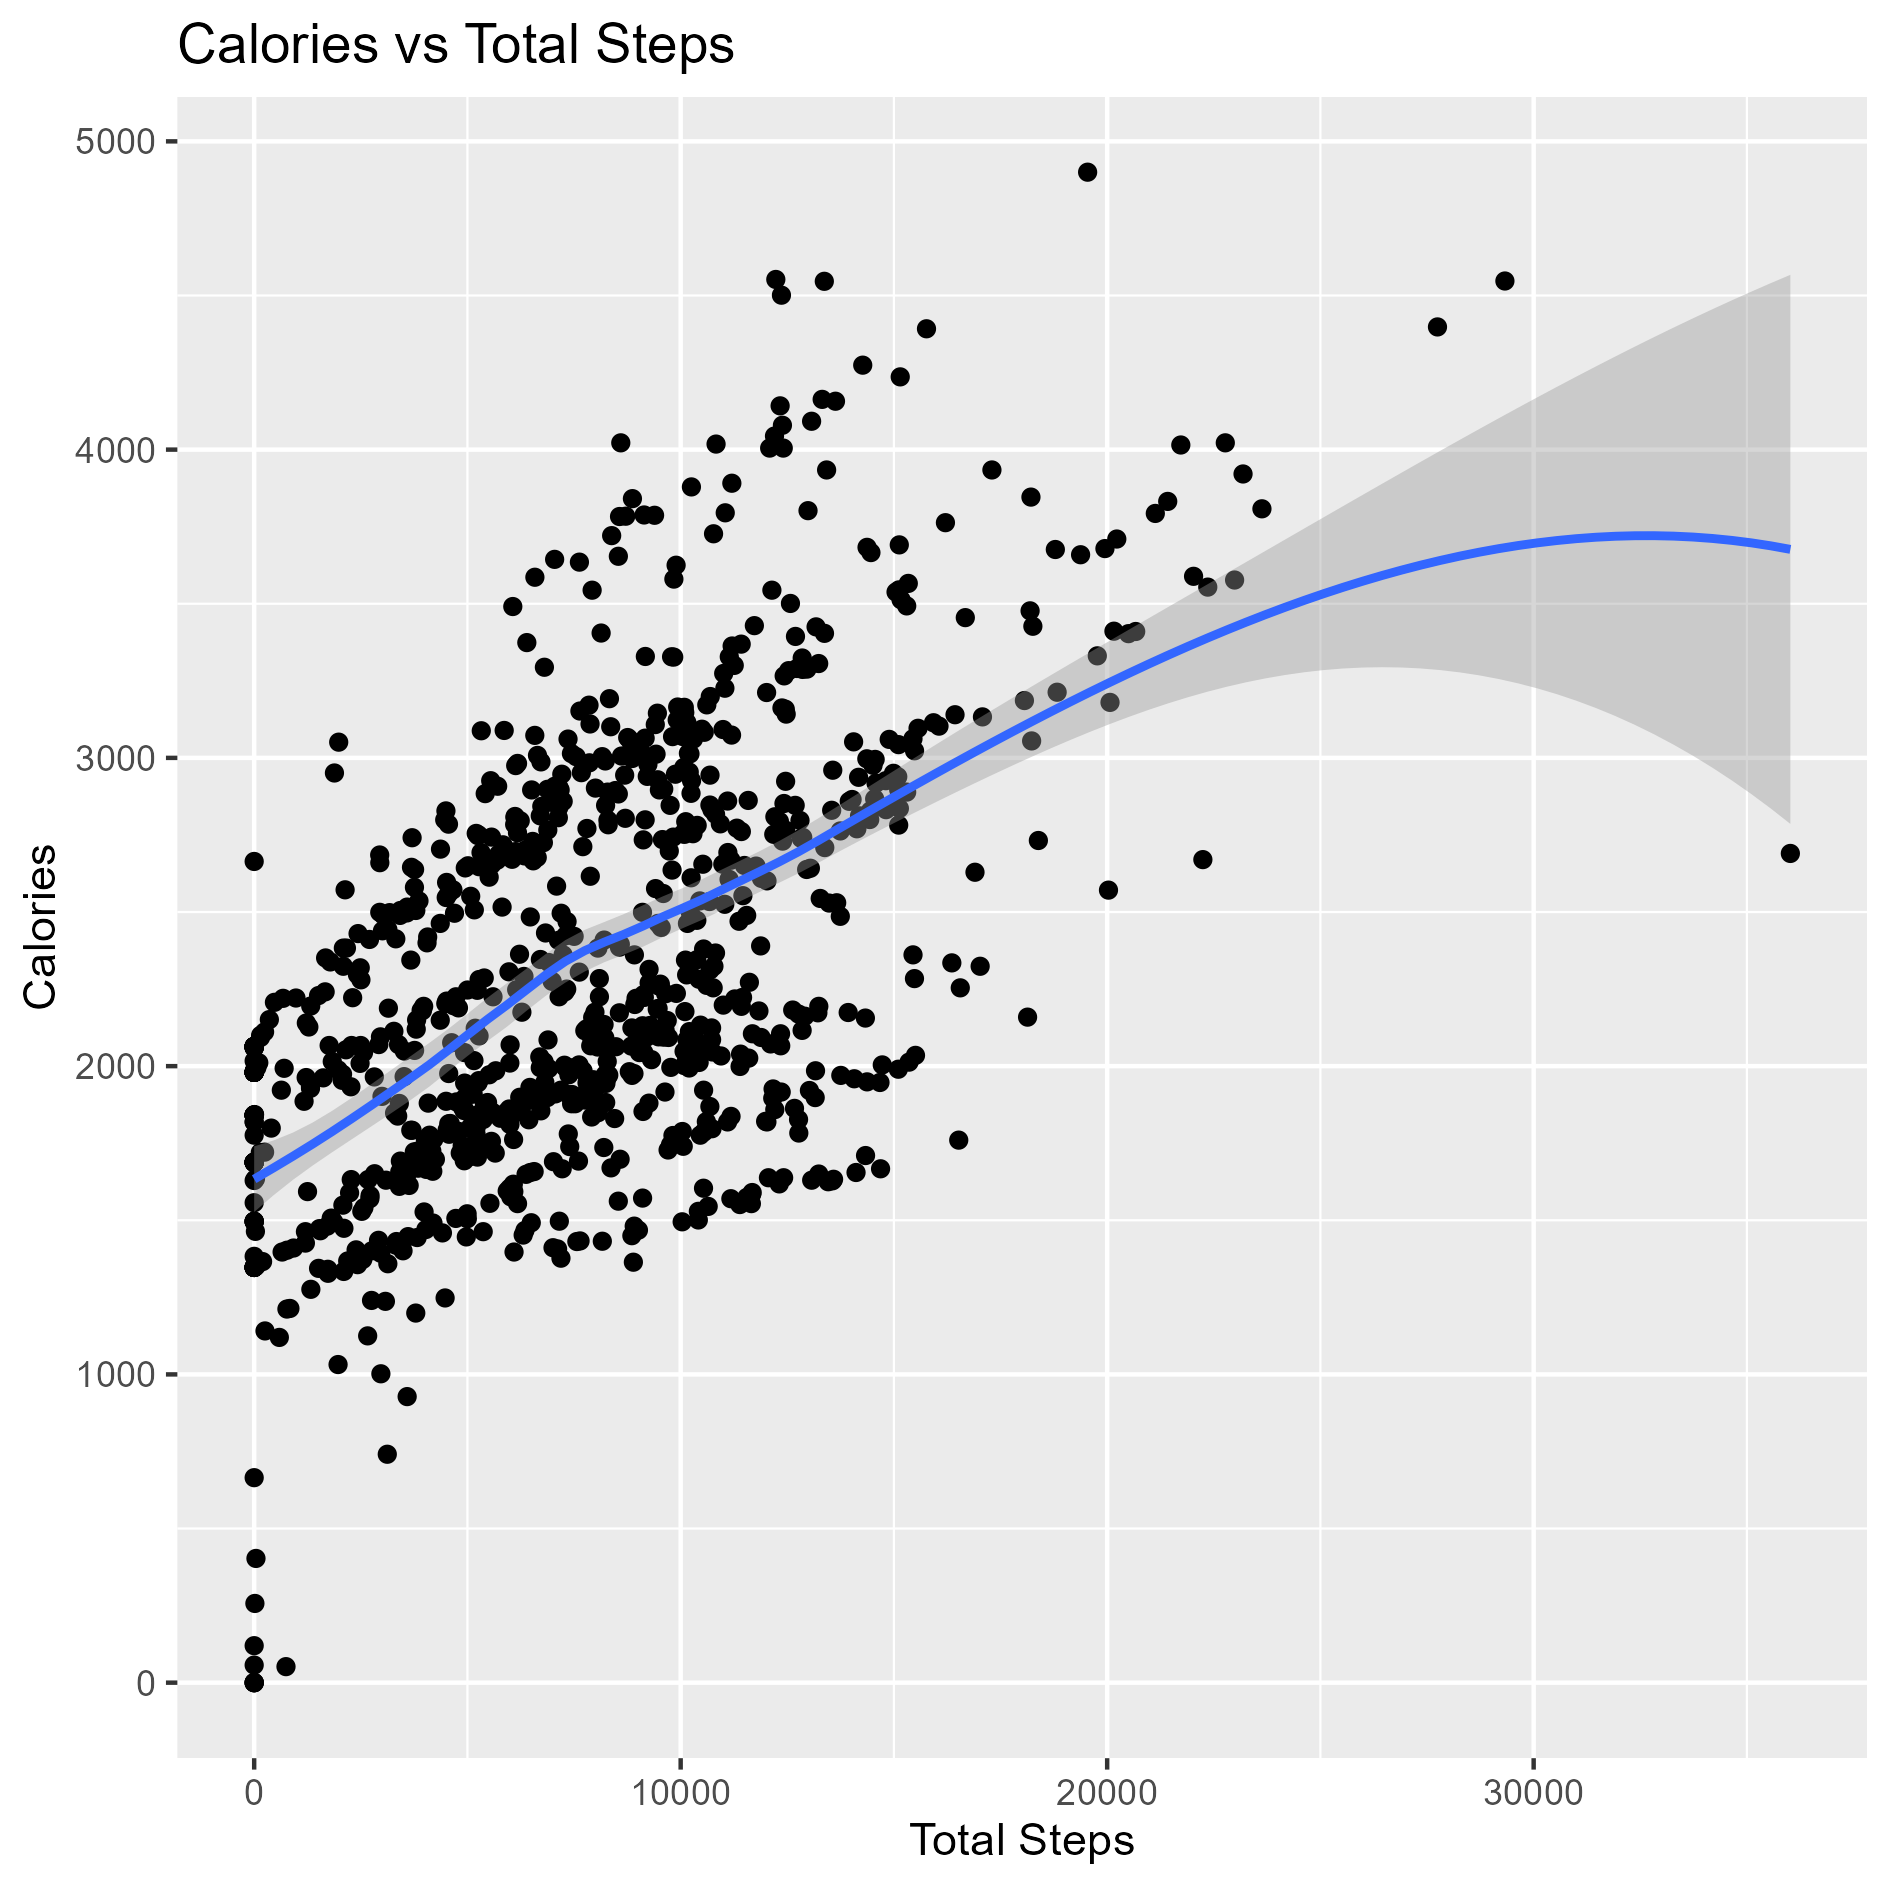
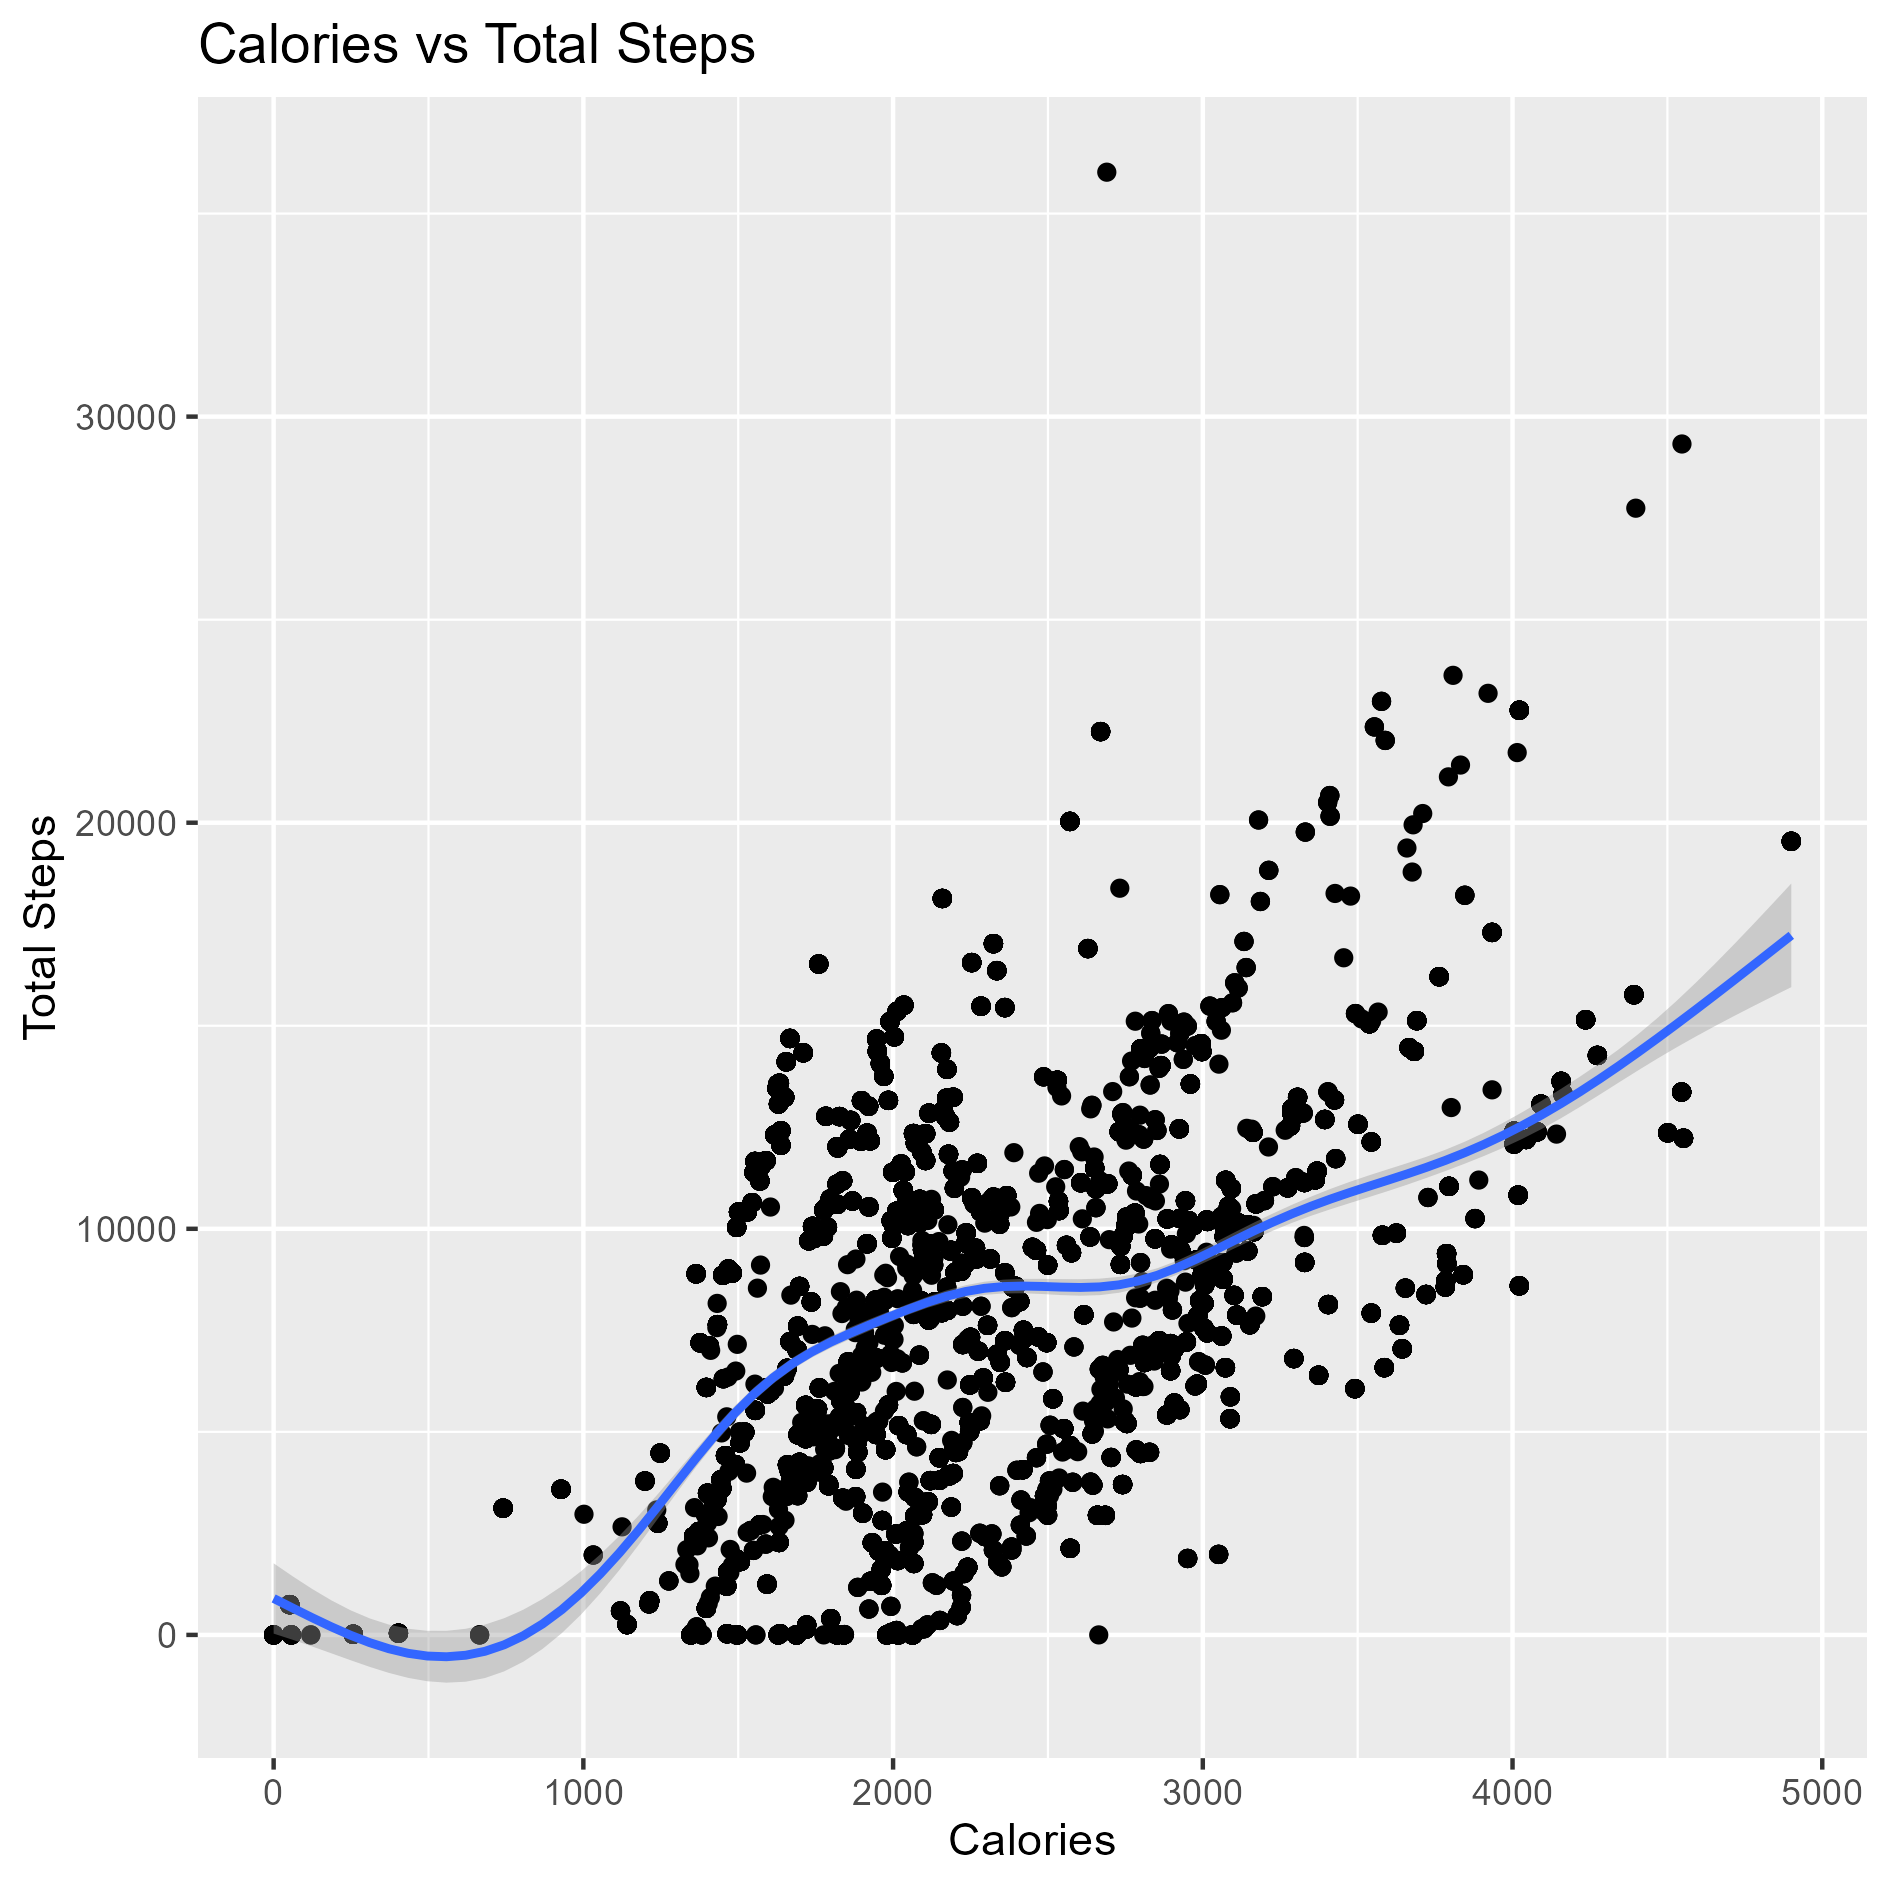
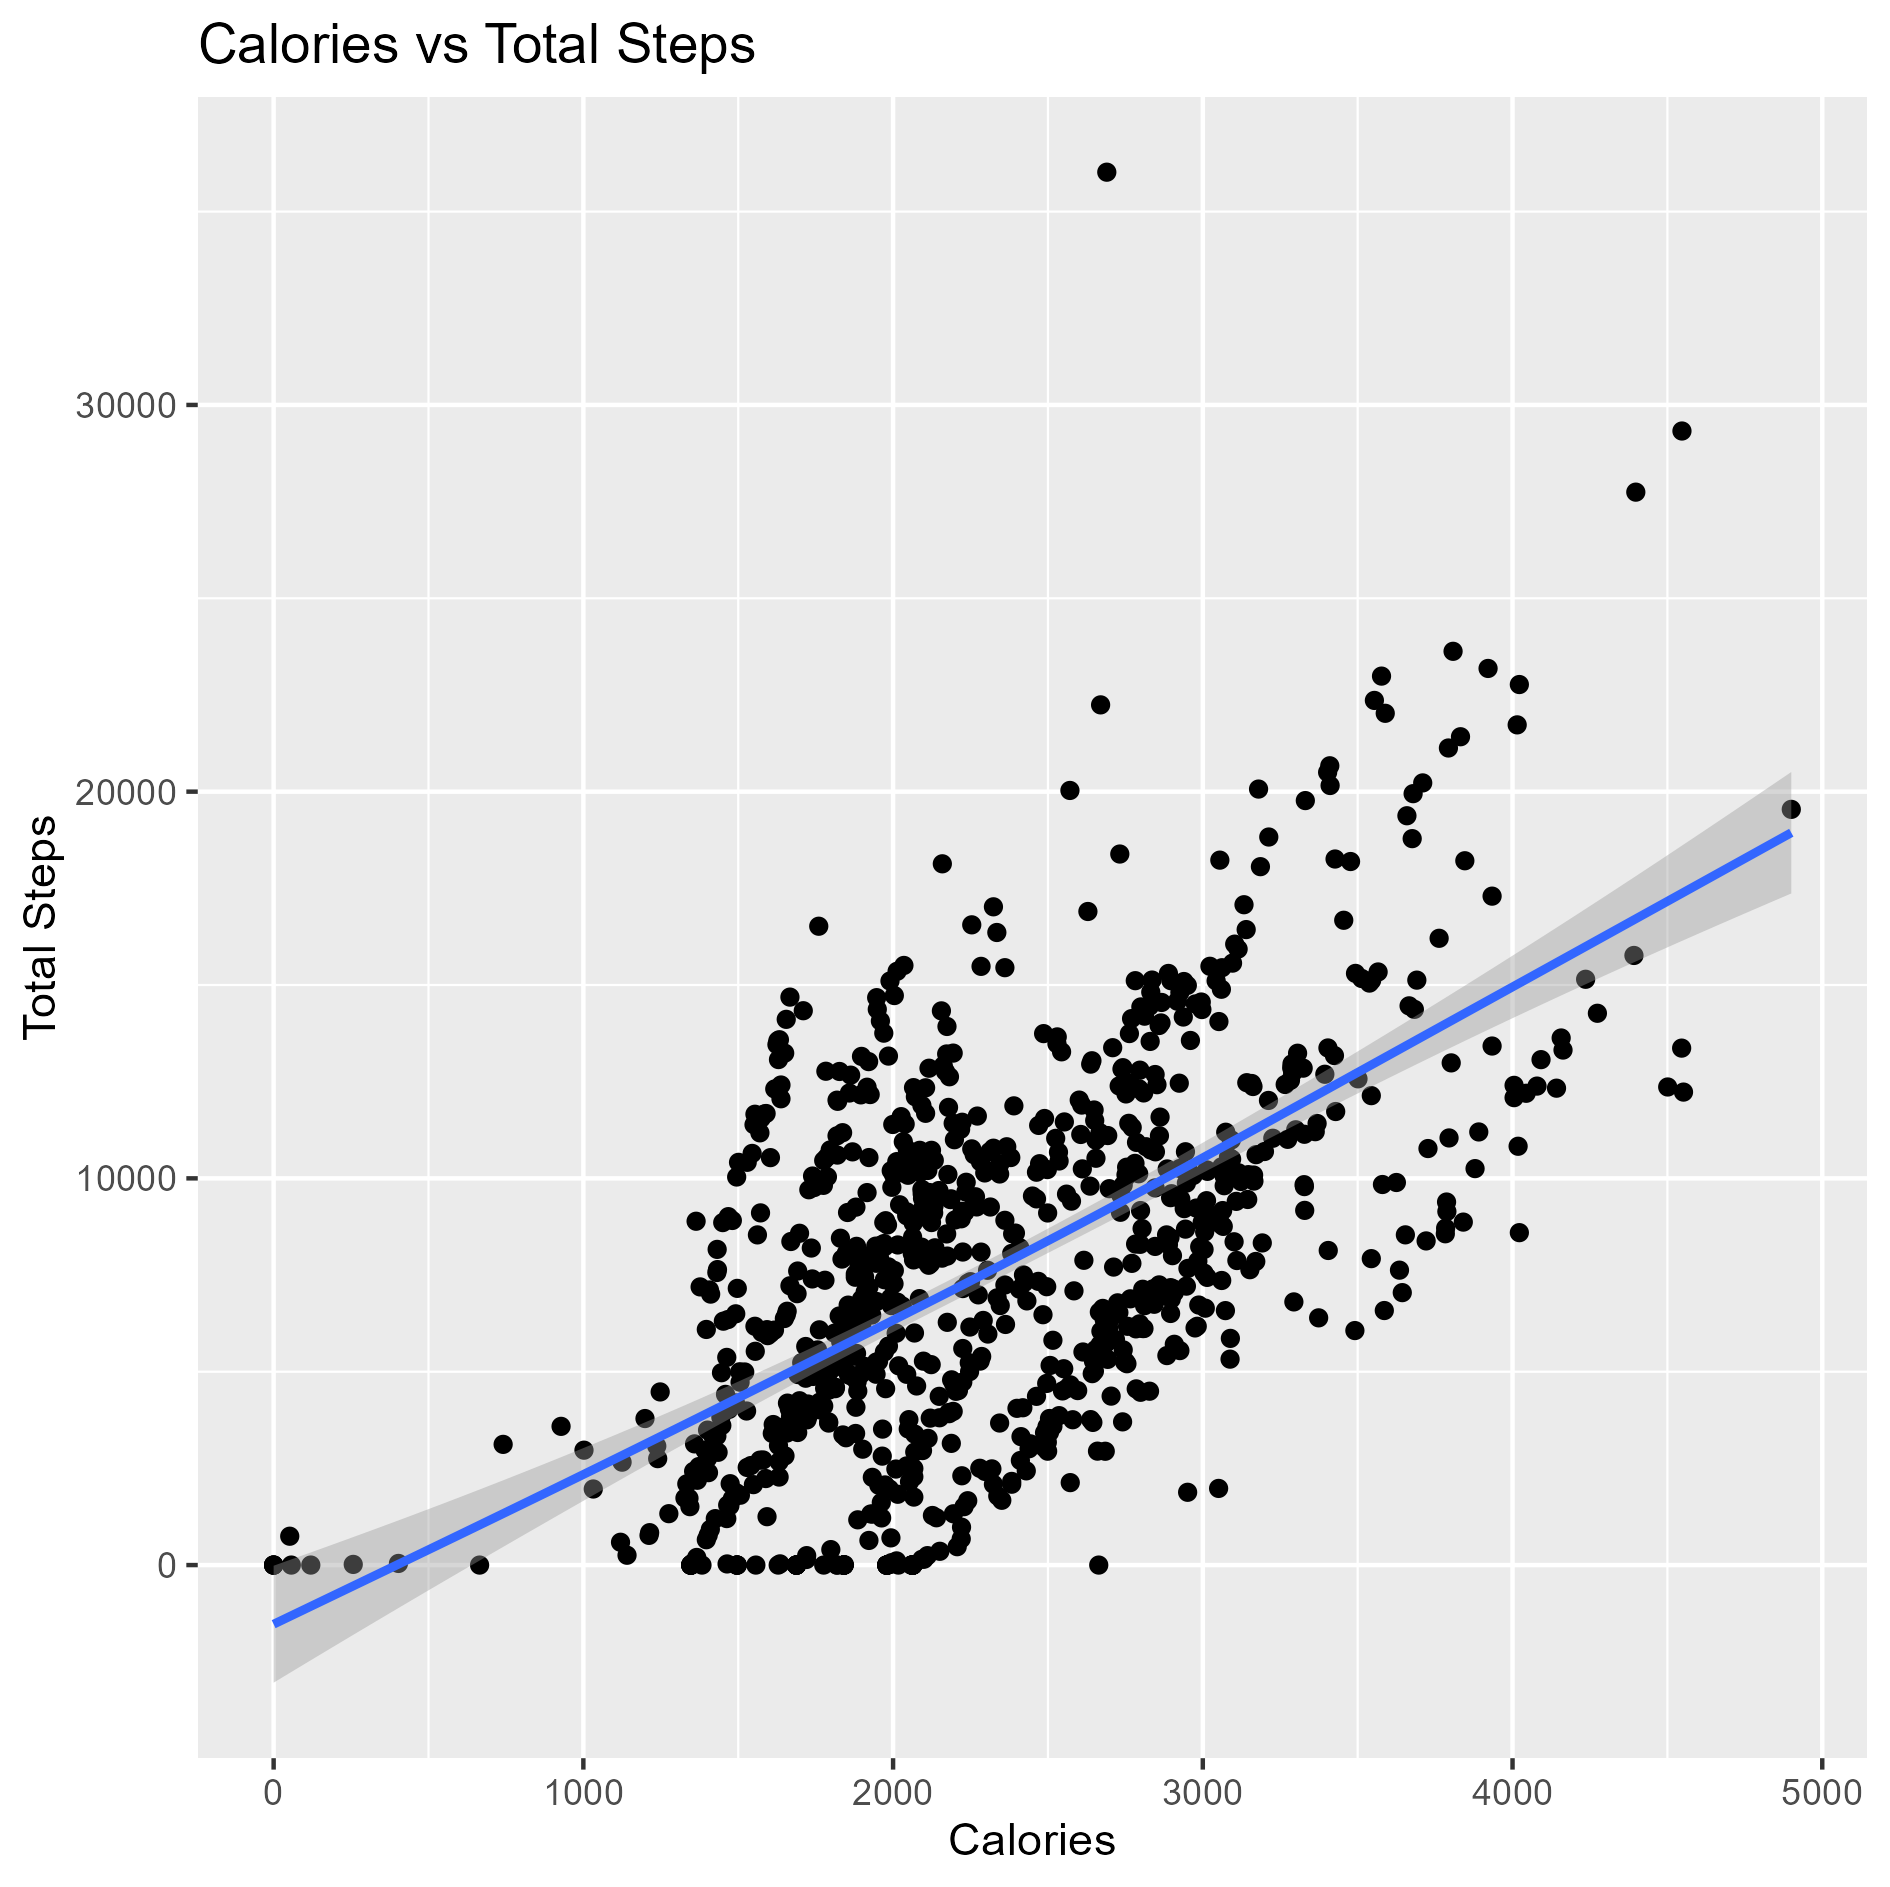
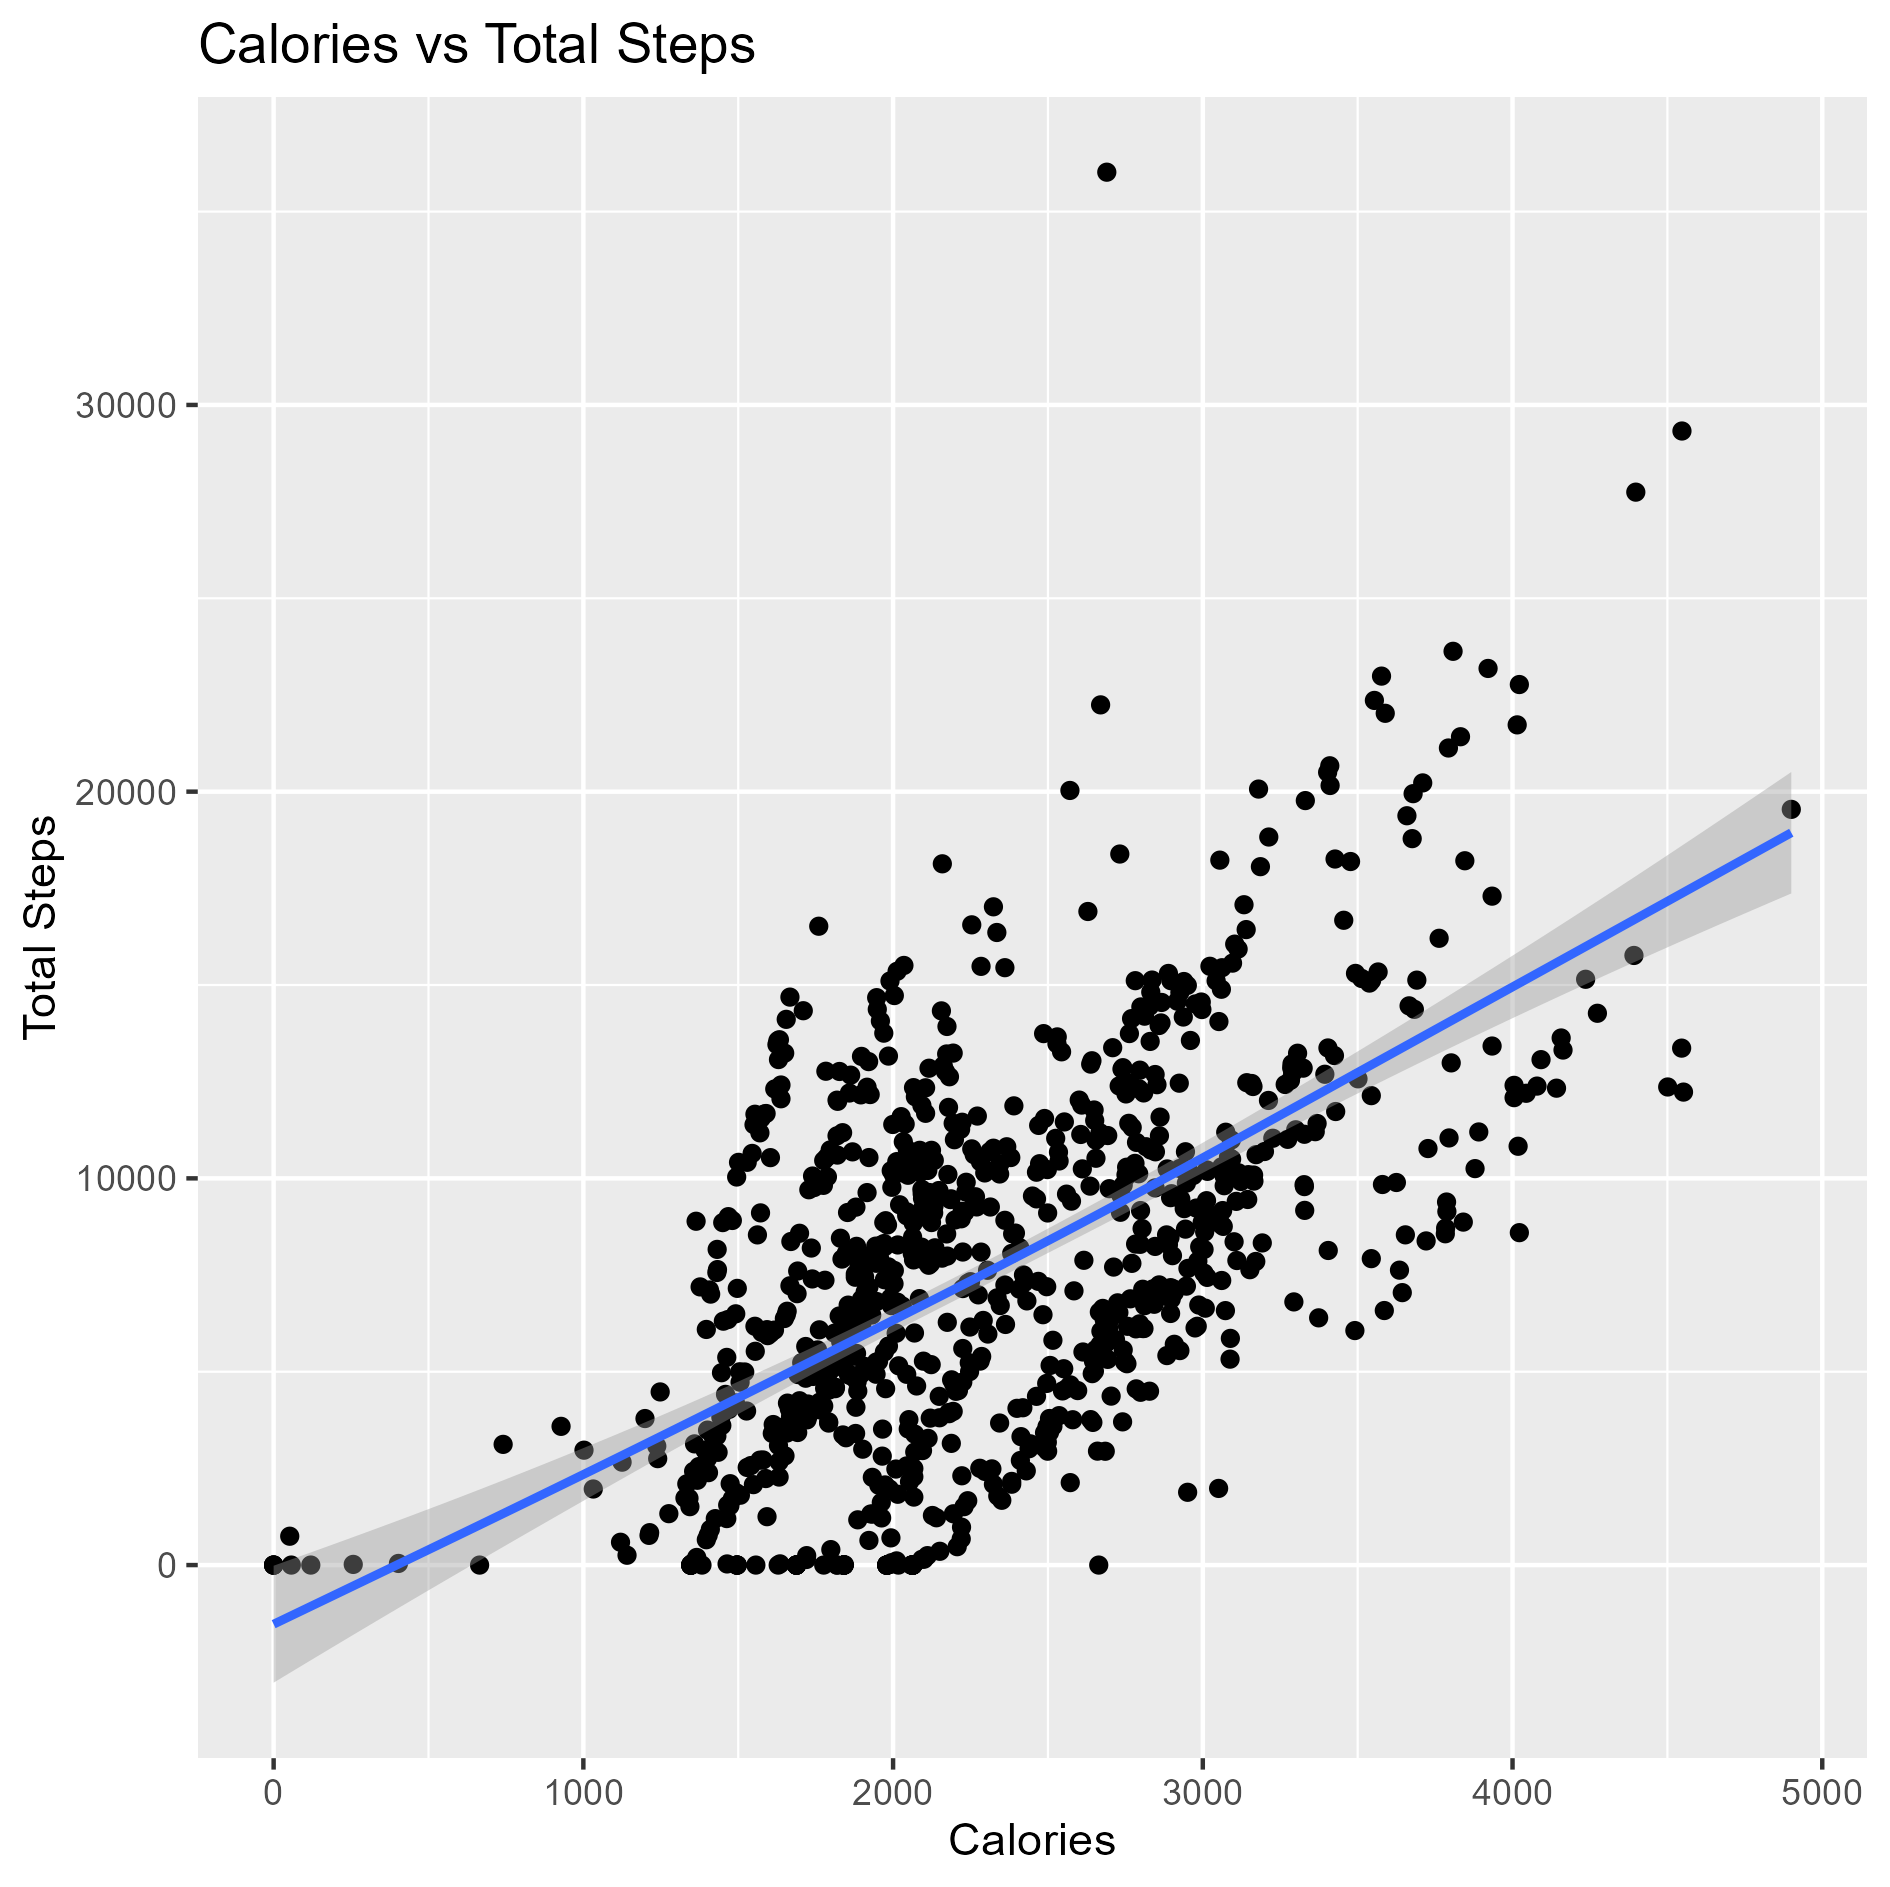

Next, I will look at the relationship between calories burned and the amount of time sleeping. I suspect that the more time someone spends sleeping,the more calories that they will burn. 

In [ ]:
ggplot(data=combined_data, aes(x=totalminutesasleep, y=calories)) + 
	geom_point() + 
	geom_smooth(method="loess") +
	ggtitle("Calories vs Minutes Sleeping") + 
	labs(x= "Total Minutes Sleeping", y = "Calories")

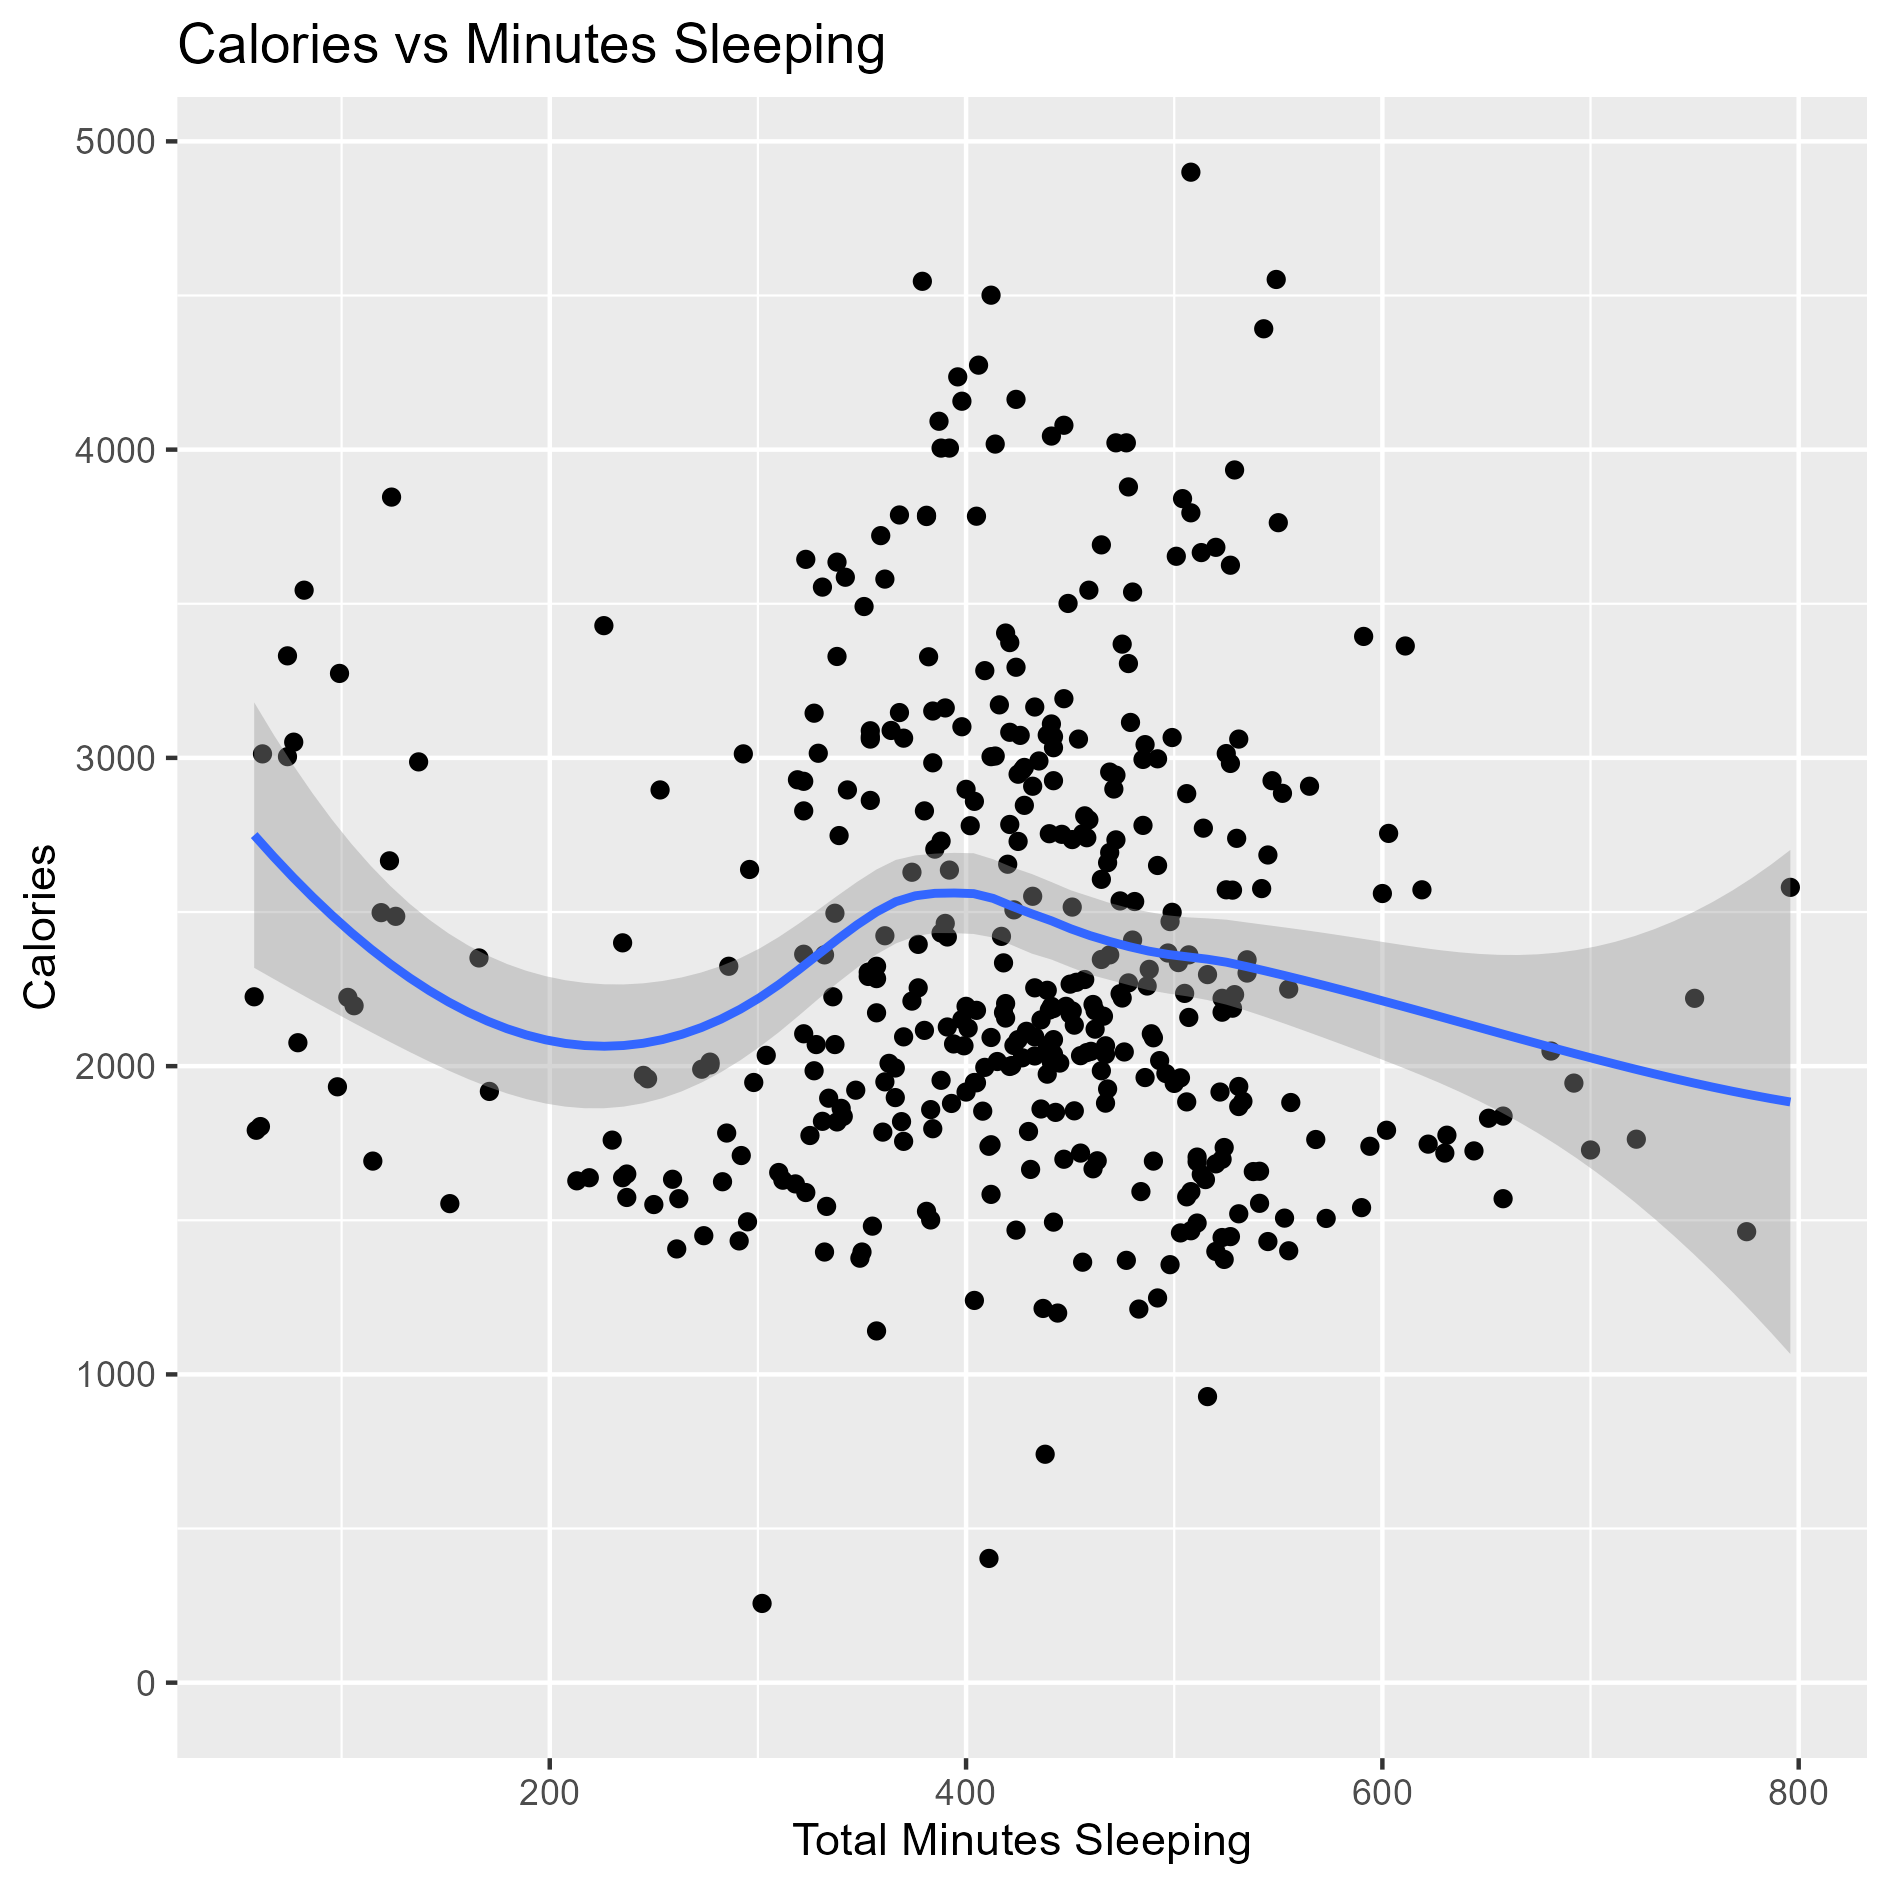

Interestingly, there does not seem to be a correlation between sleep and calories burned. 

Now, I would like to see if there is a correlation between sleep and steps taken.
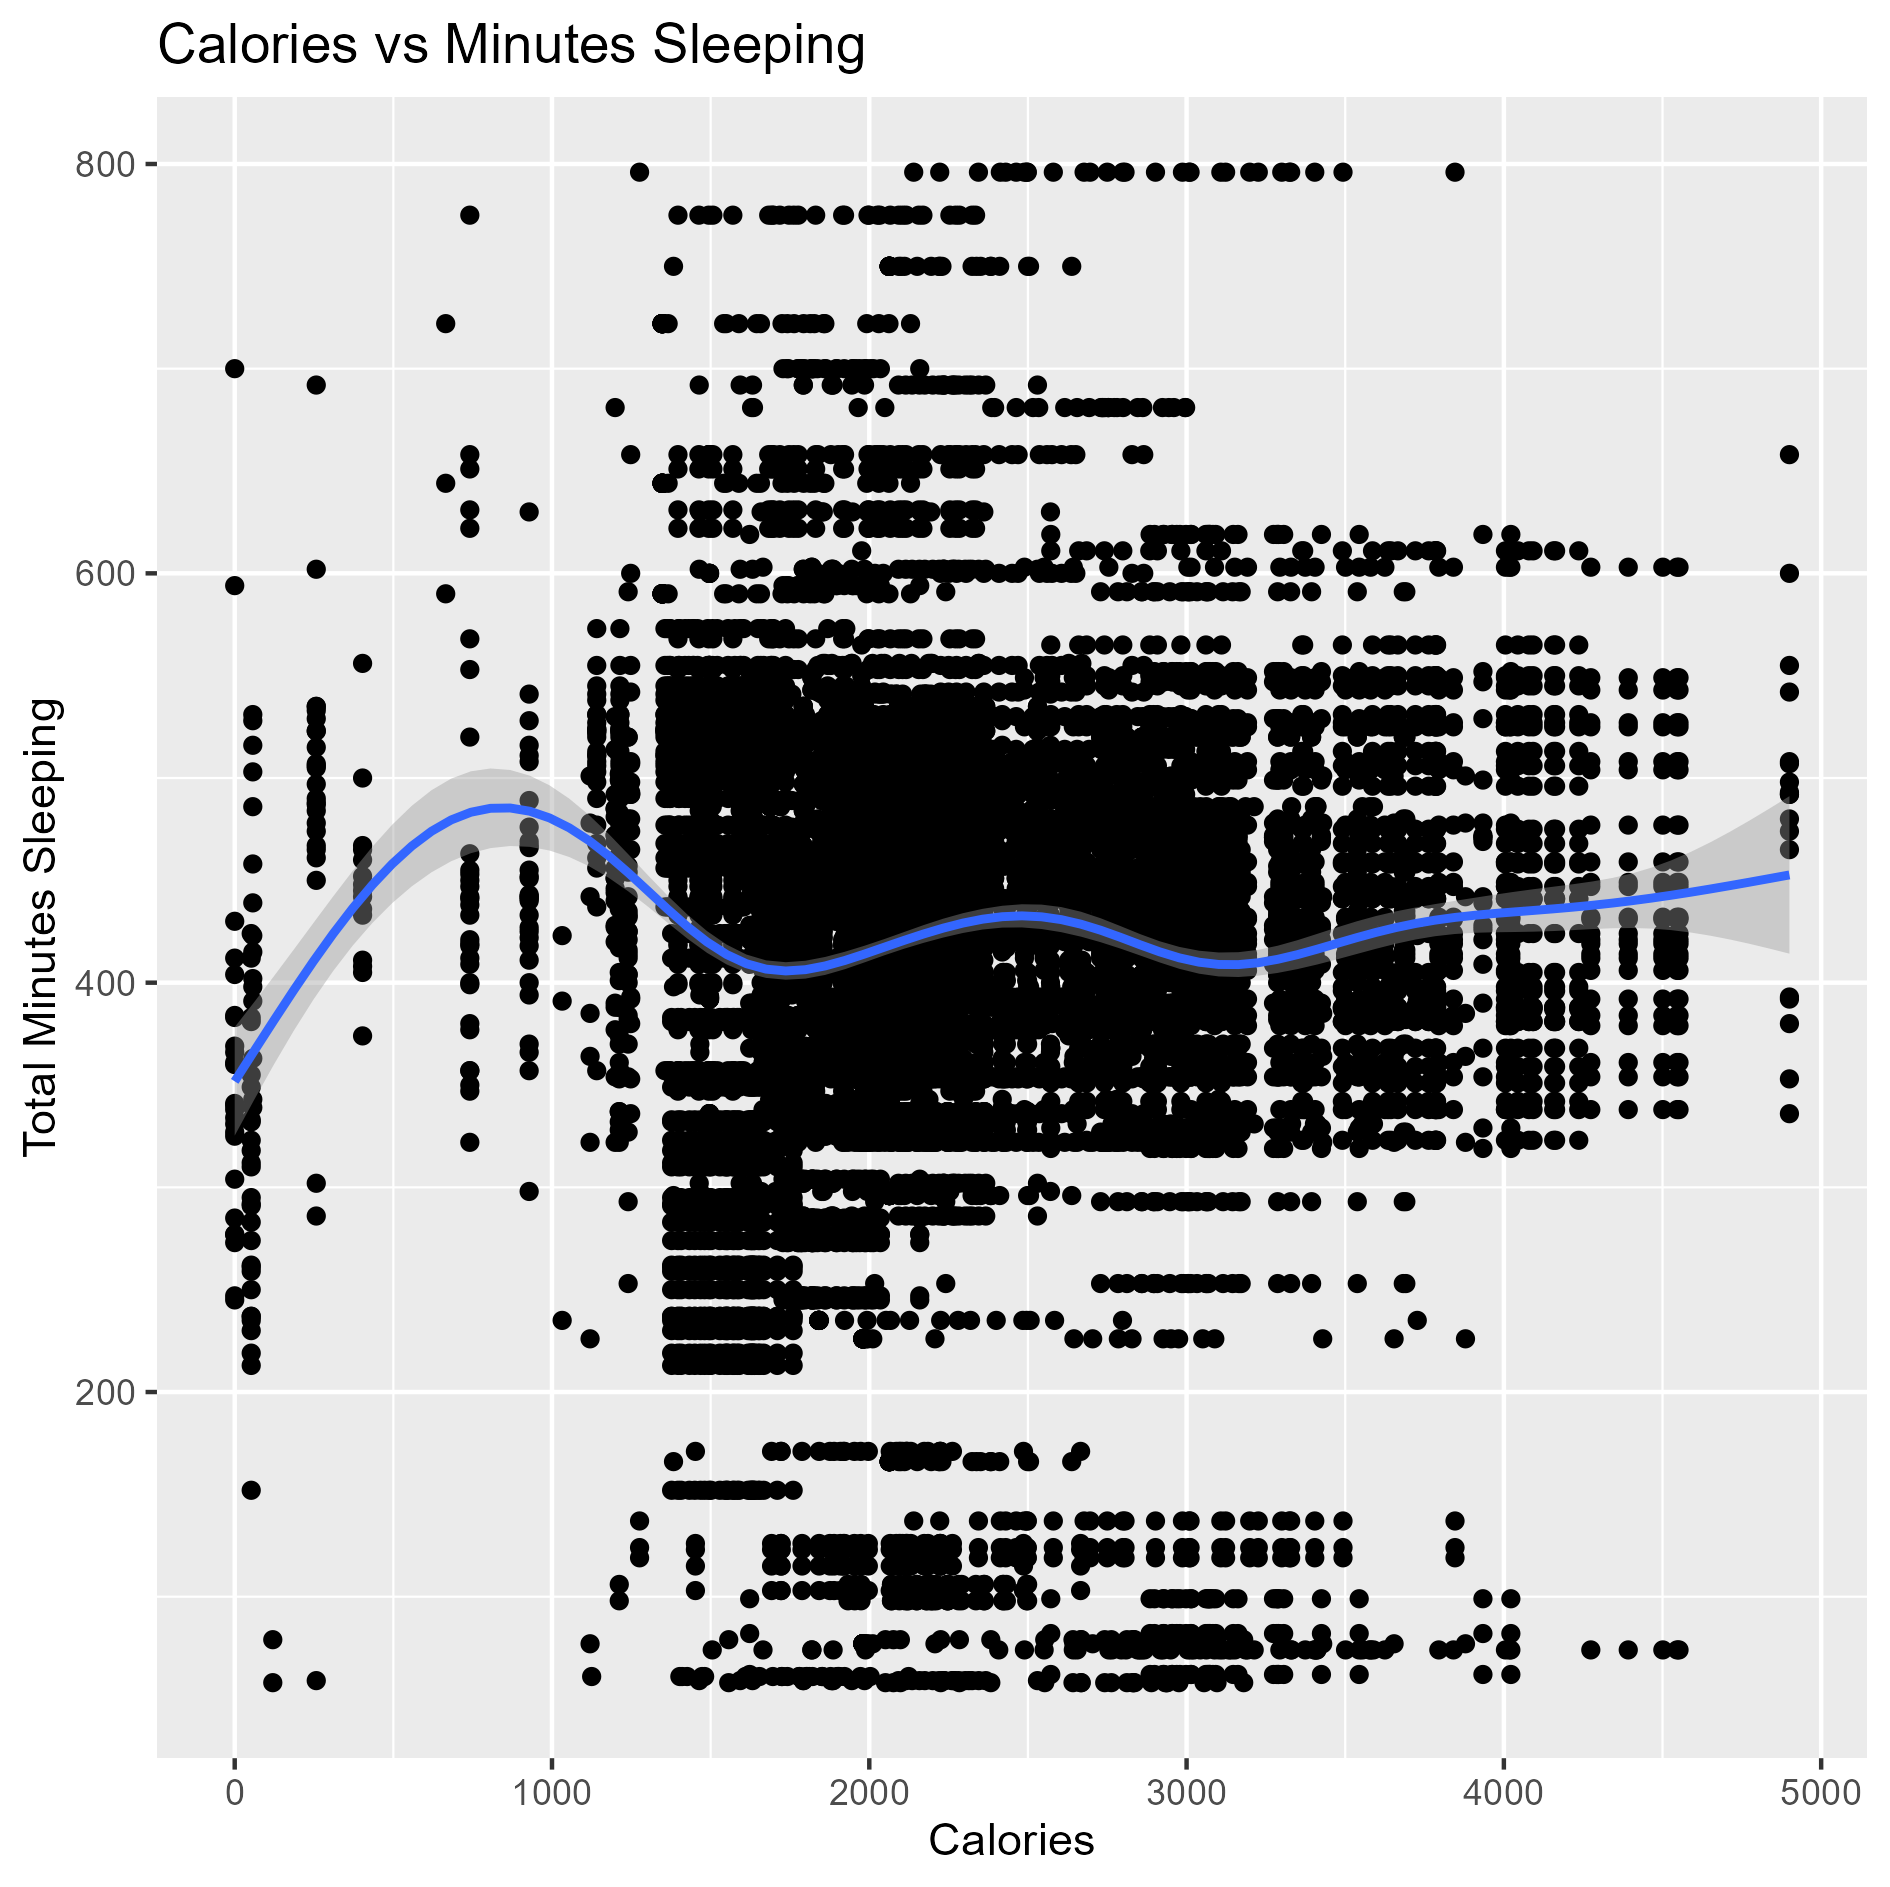
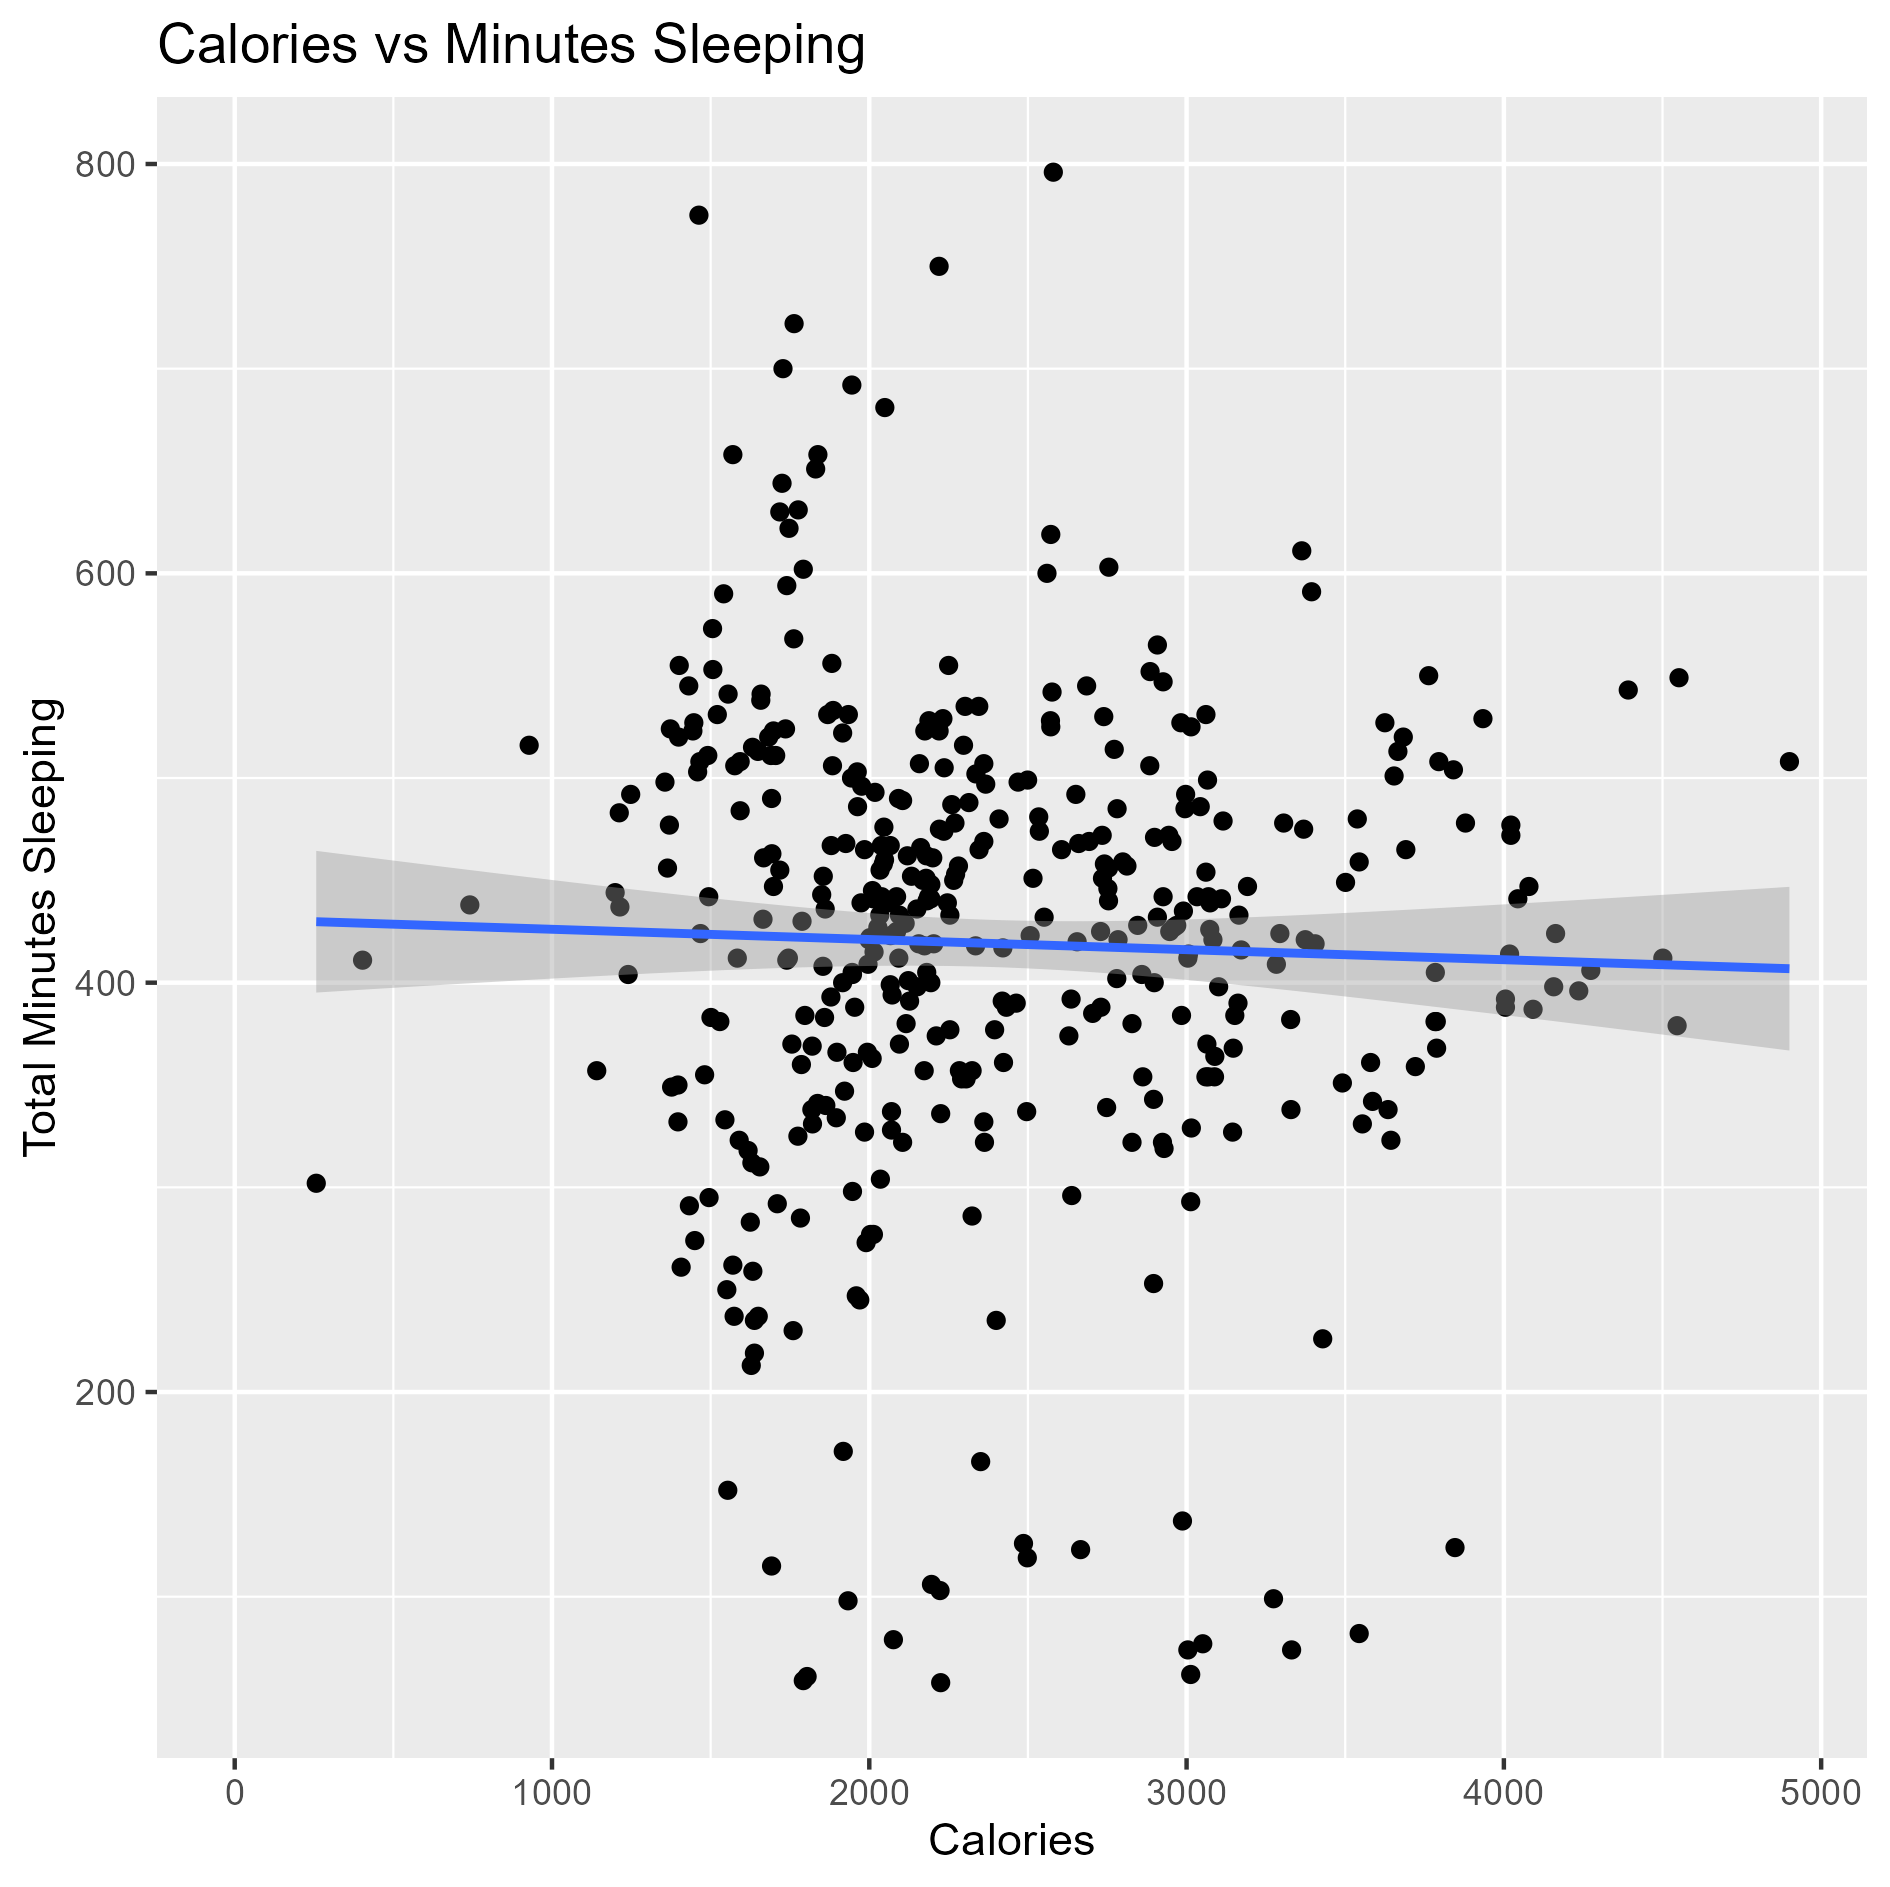
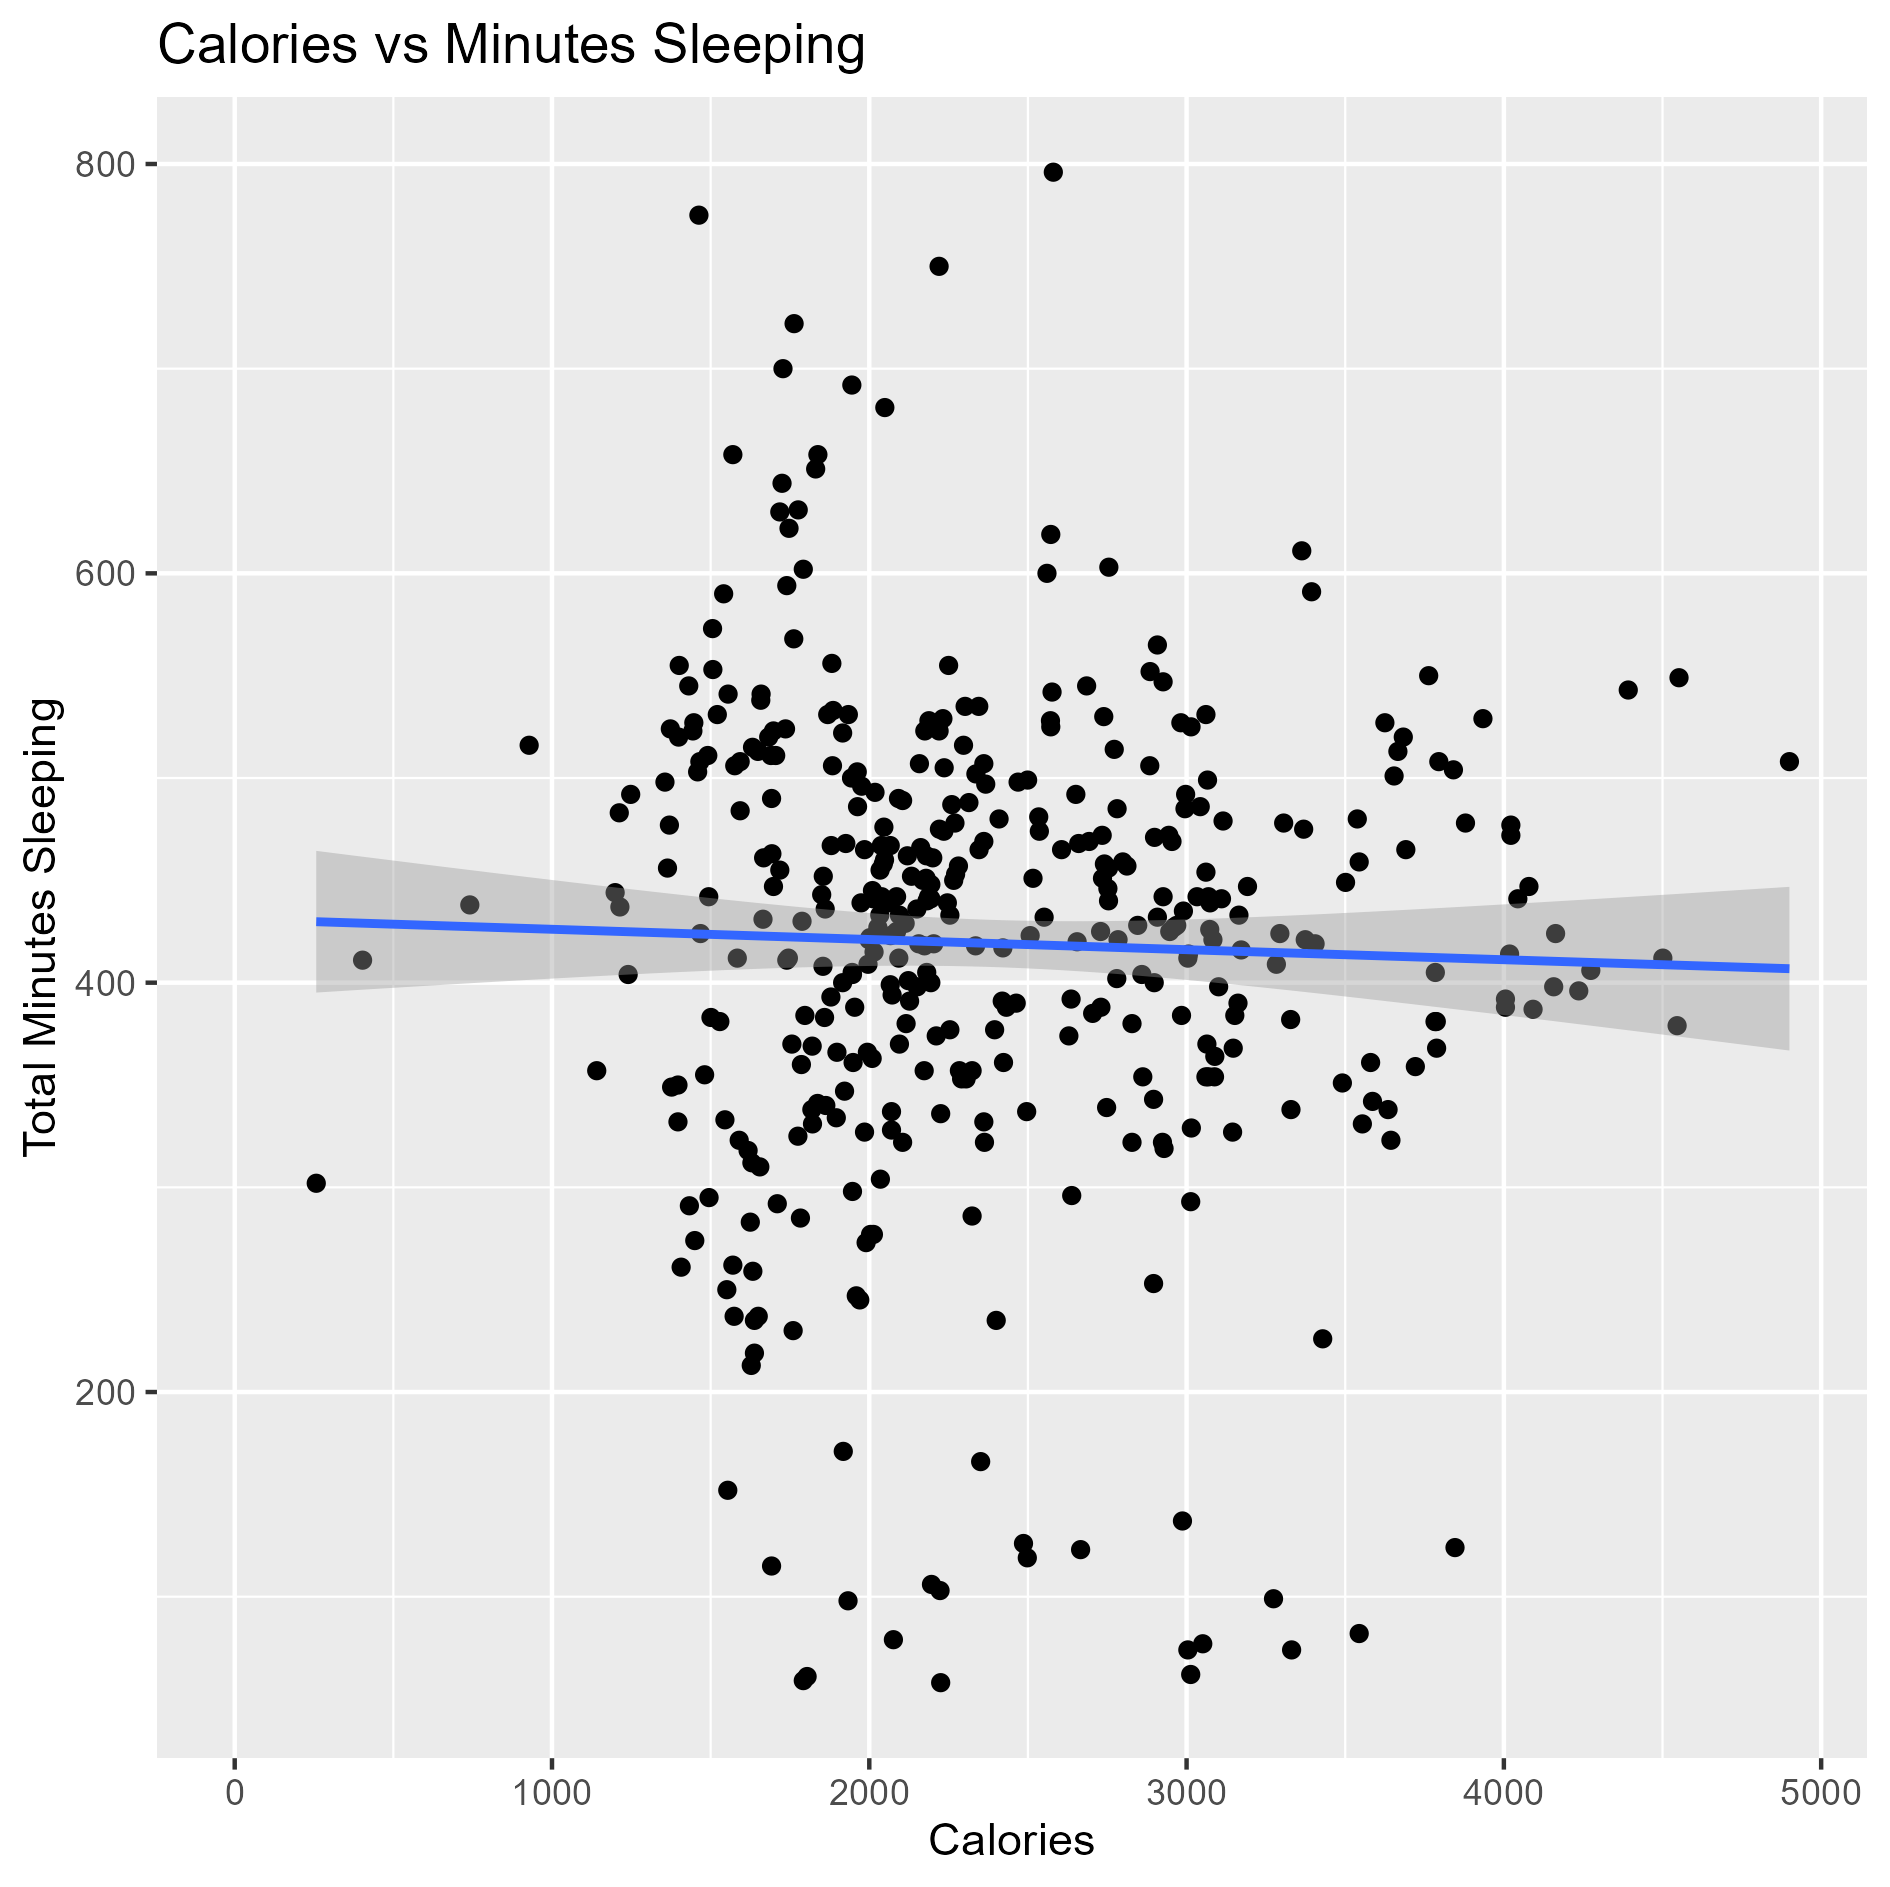

In [ ]:
ggplot(data=combined_data, aes(y=totalsteps, x=totalminutesasleep)) + 
	geom_point() + 
	geom_smooth(method="loess") +
	ggtitle("Total Steps vs Minutes Sleeping") + 
	labs(y= "Total Steps ", x = "Total Minutes Sleeping") +
	ylim(0,25000)

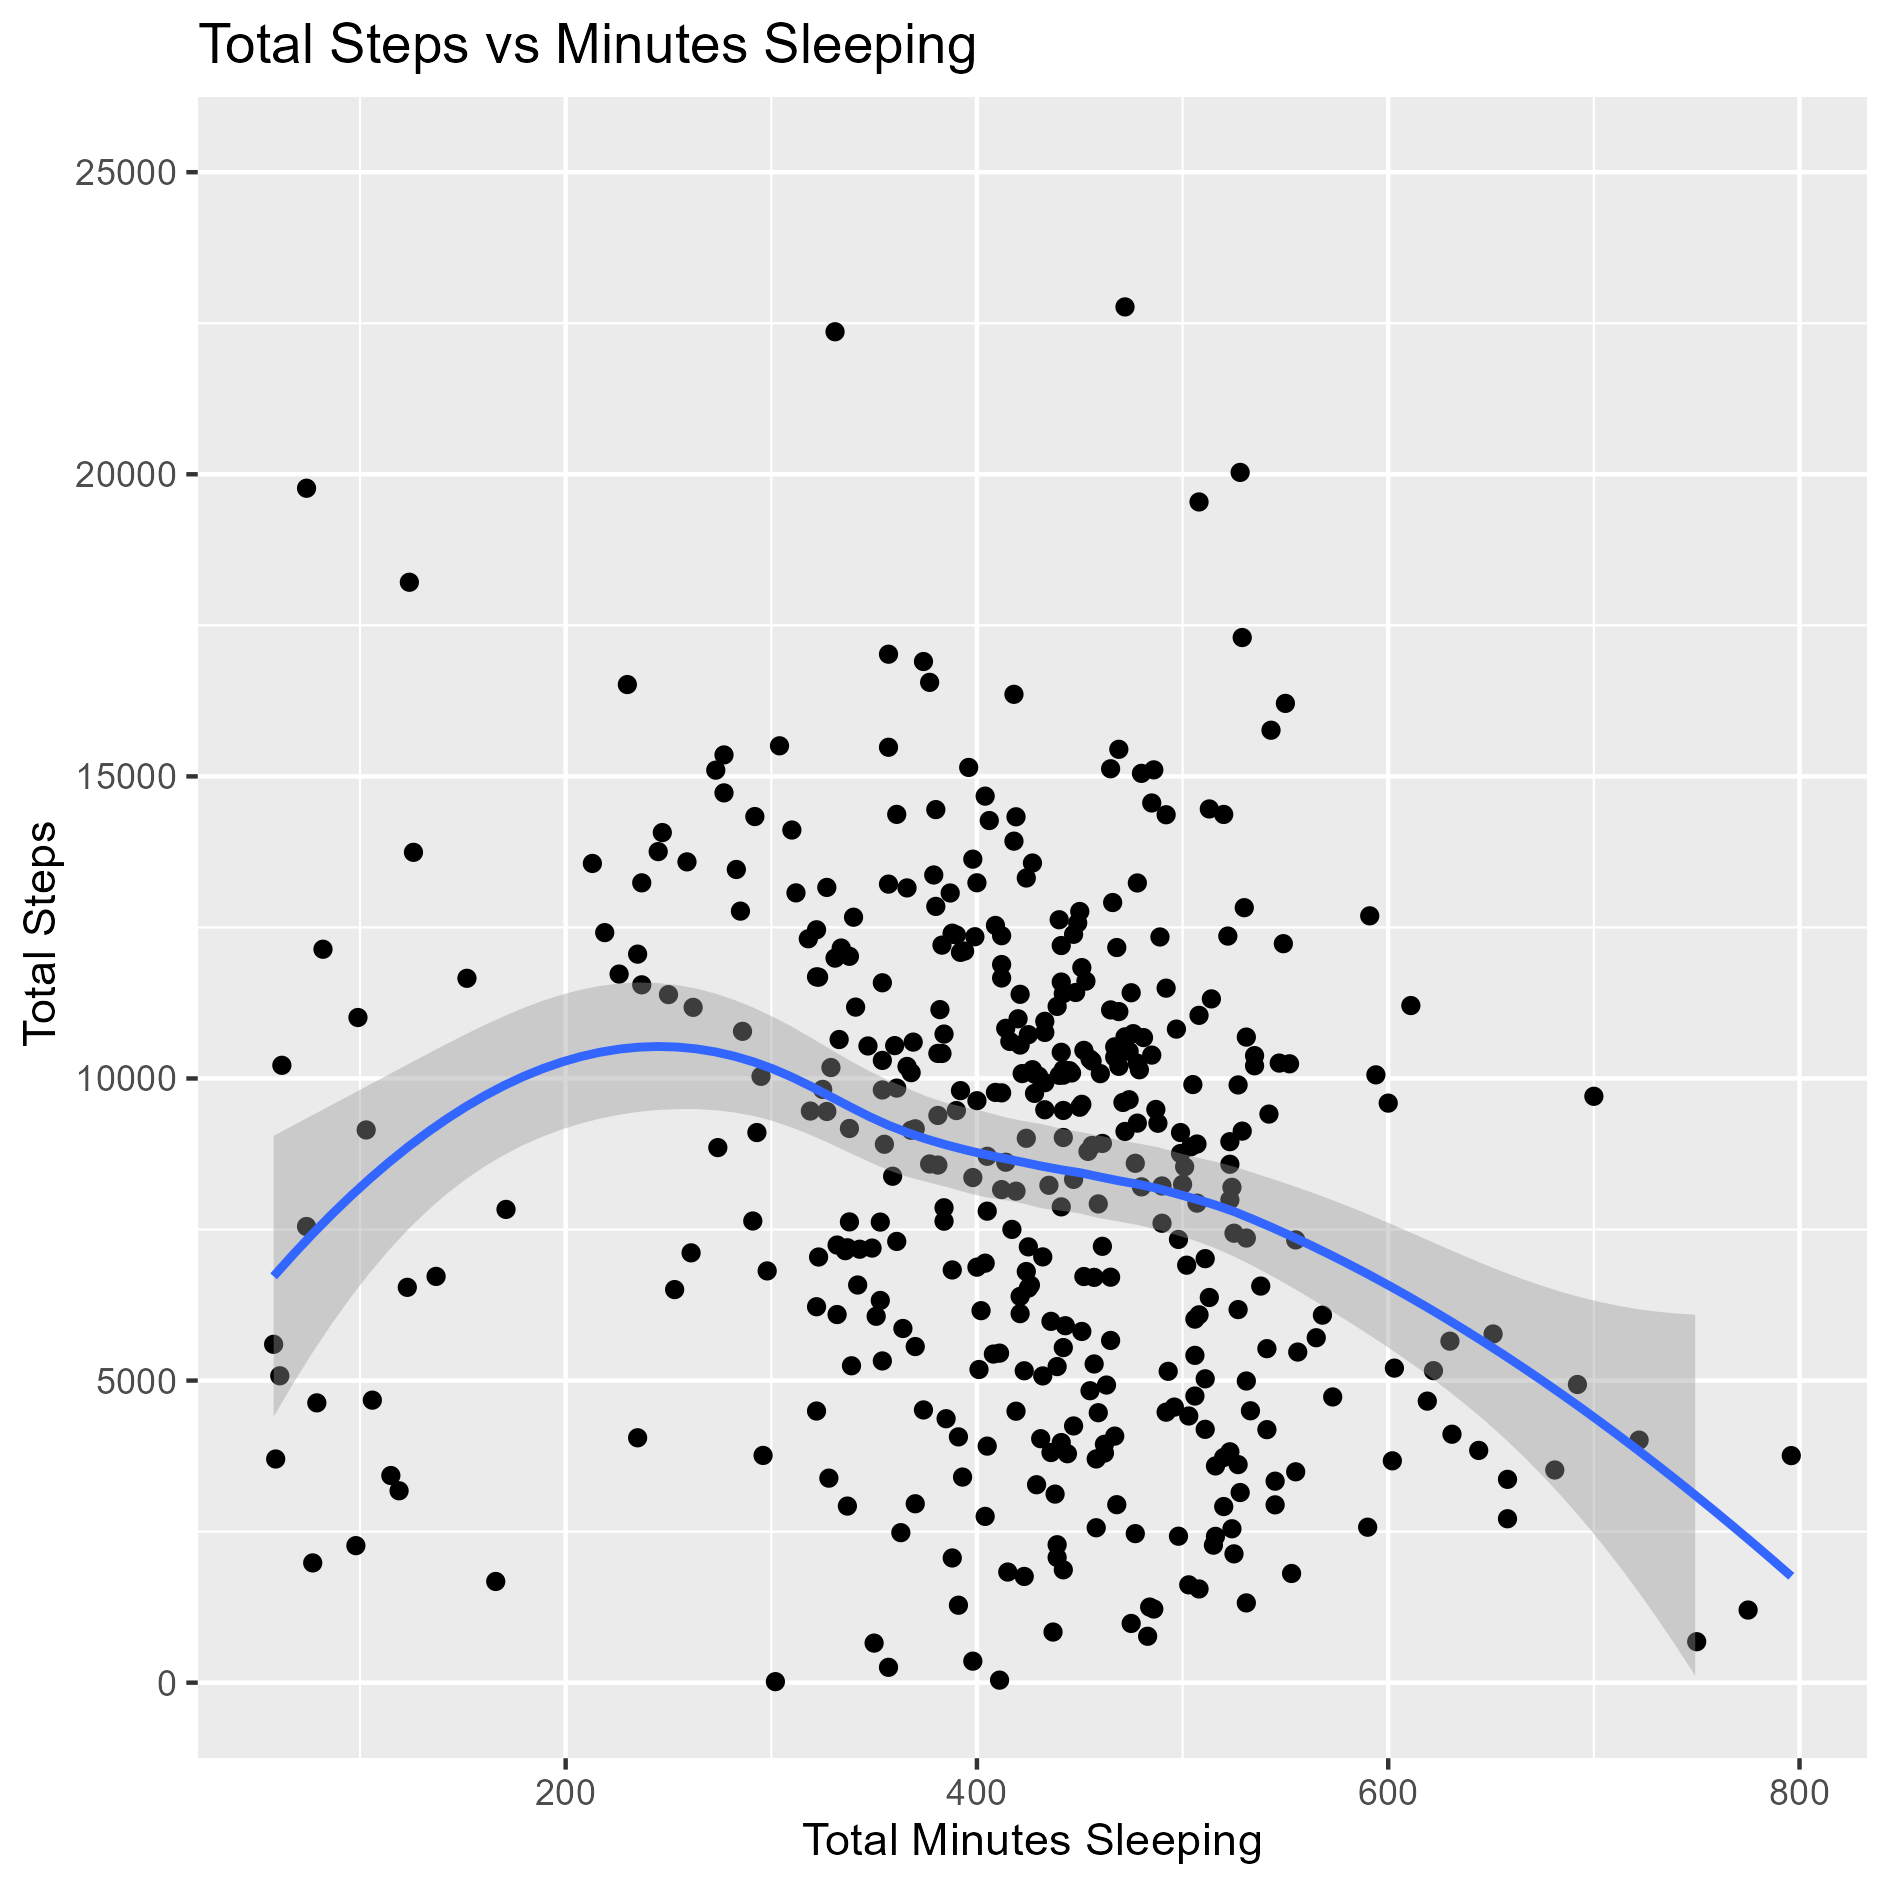

We see that there appears to be a certain point where the more a person sleeps, the less steps they get in daily. Interesting!

I would like to look at the relationship between total minutes of sleep and minutes of activity. In order to do this, I first need to pivot the activity time data into long form since there are several categories that I would like to look at at once. I will also add a column that will include the total of all activity.
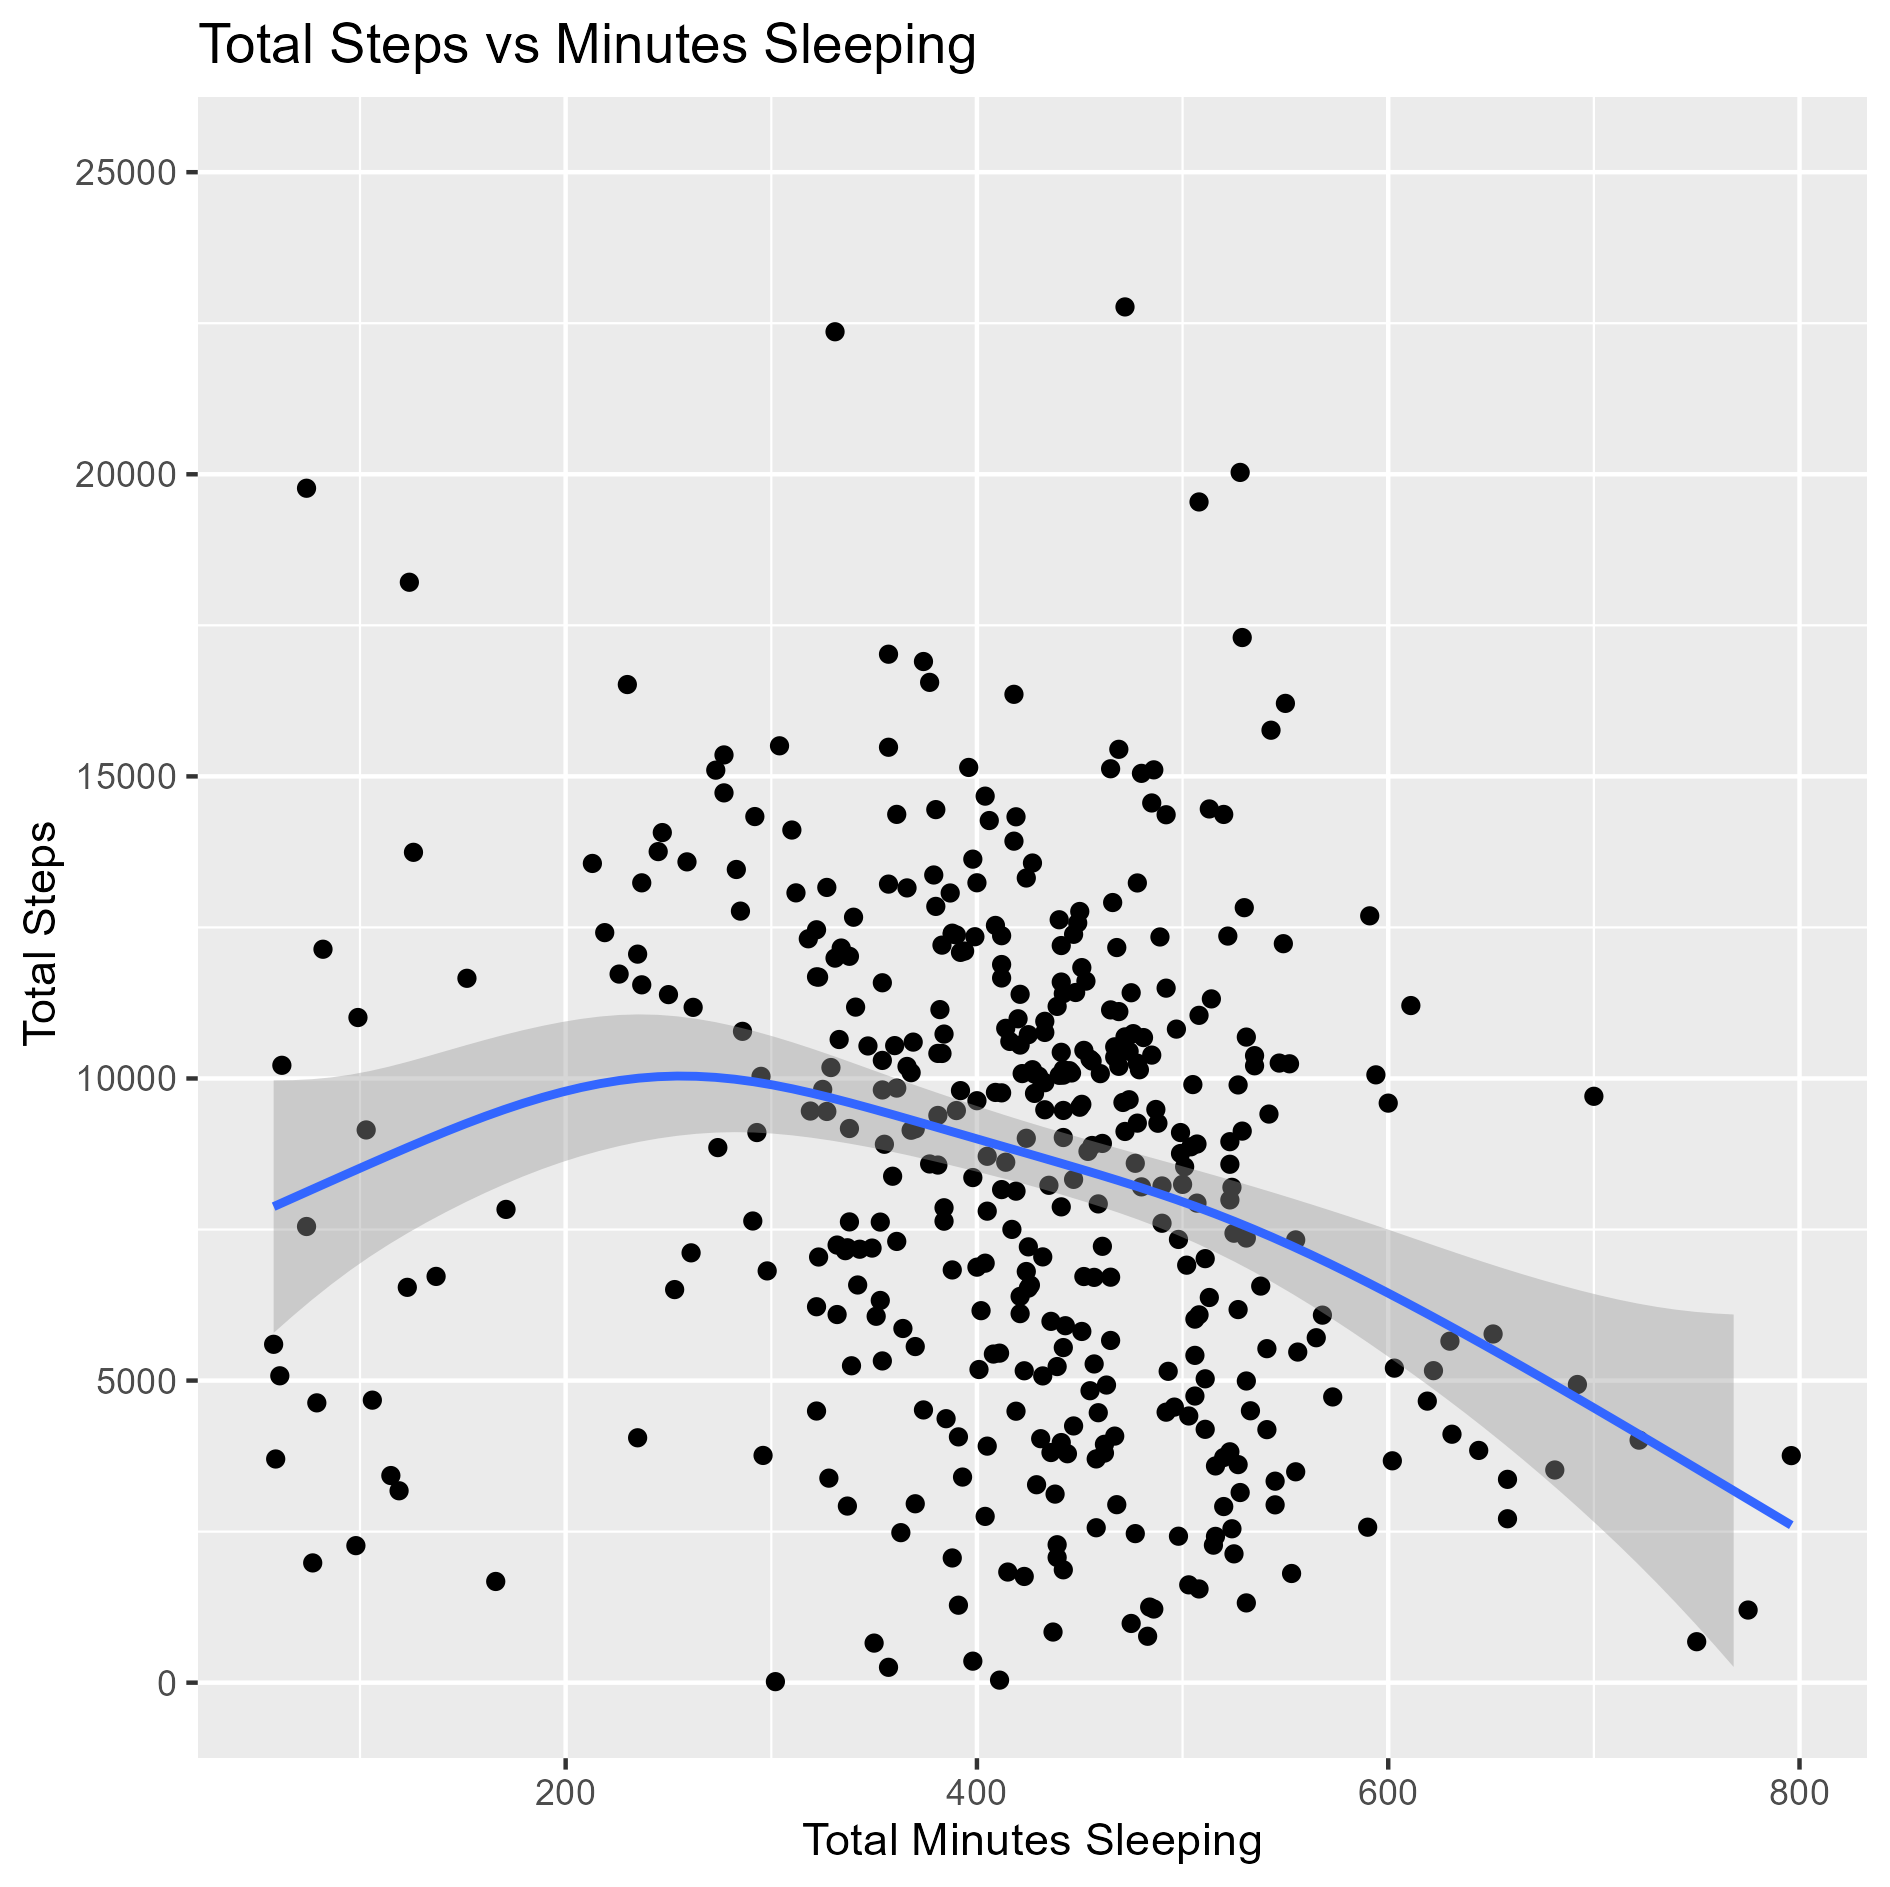

In [ ]:
combined_data <- combined_data %>% mutate(totalactiveminutes = veryactiveminutes + fairlyactiveminutes + lightlyactiveminutes + sedentaryminutes)

combined_data_long <- pivot_longer(data=combined_data, 
	cols = c("veryactiveminutes","fairlyactiveminutes", "lightlyactiveminutes", "sedentaryminutes", "totalactiveminutes"), 
	names_to = "activity", 
	values_to = "time")

ggplot(data=combined_data_long, aes(x=totalminutesasleep, y = time, colour = activity)) +
	geom_point() +
	geom_smooth(method="gam", formula = y ~s(x)) + 
	ggtitle("Sleep vs Activity") + 
	labs(x = "Total Minutes Asleep ", y = "Activity Time (Minutes)")

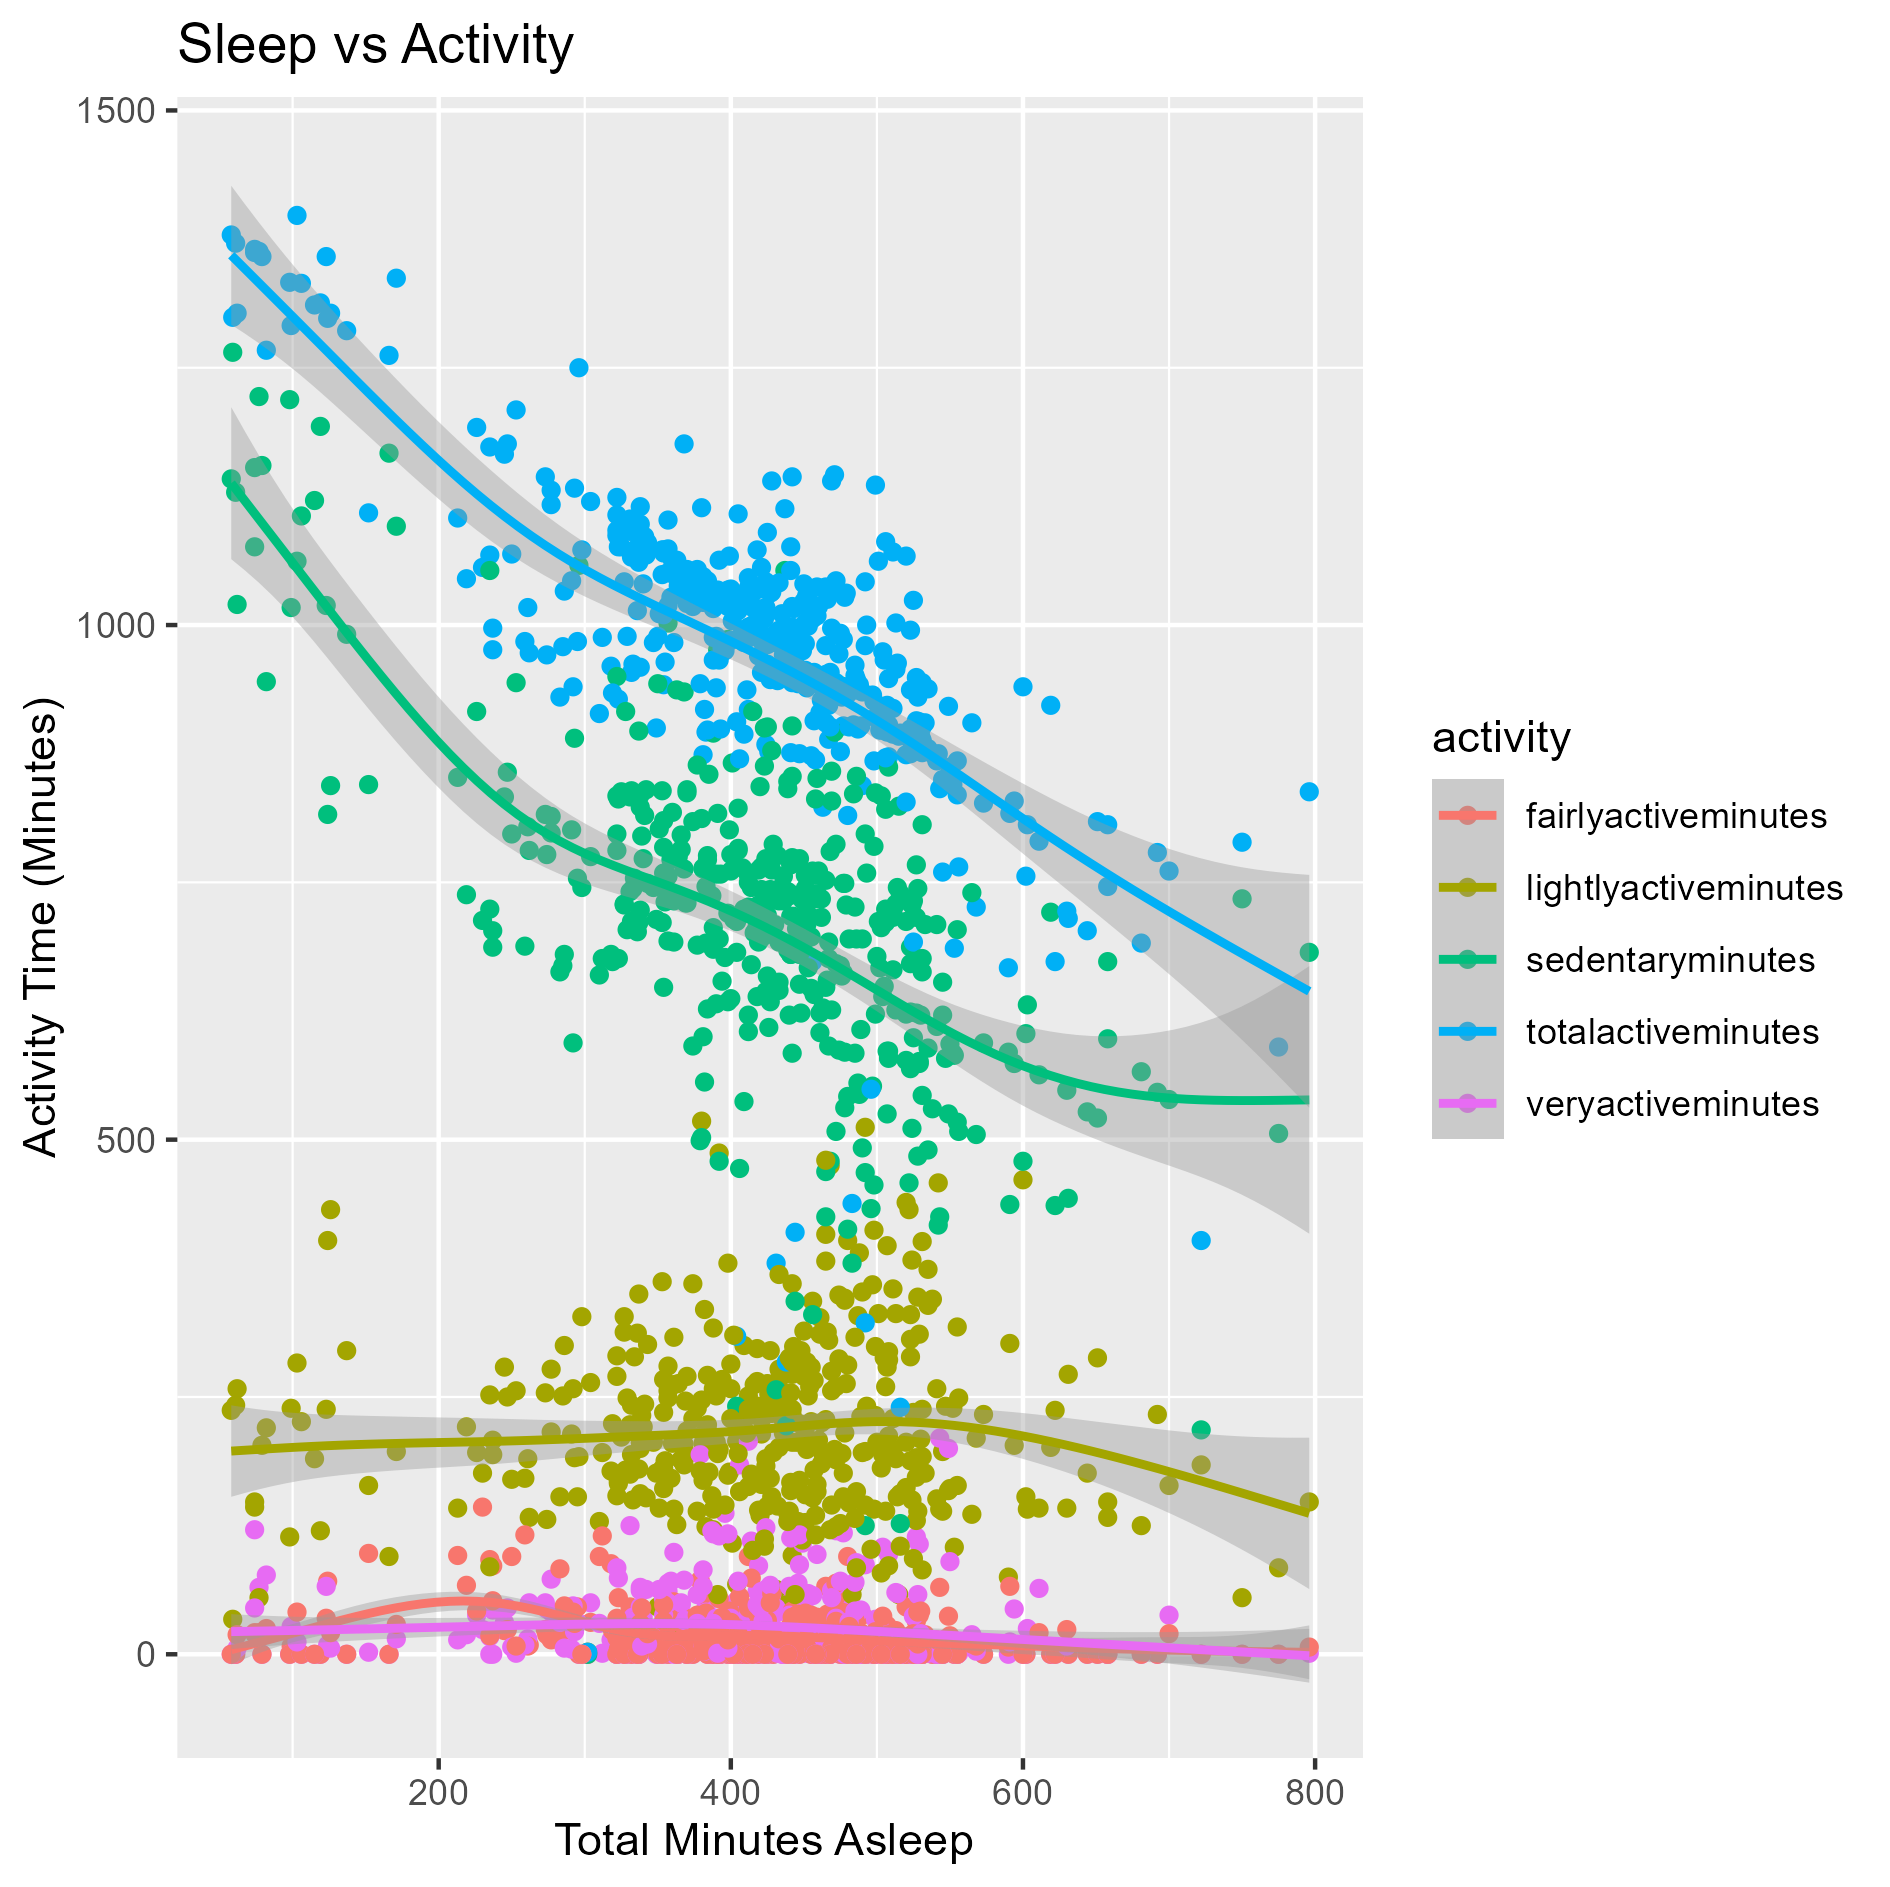

It doesn't appear the me that any particular activity group influences sleep. This is surprising. I would have expected people who trained more to sleep more.

Lastly, I will look at how activity time and calories burned are related. I expect to see that the more activity someone engages in, the more calories that they will burn.

In [ ]:
ggplot(data=combined_data_long, aes(x=calories, y = time, colour = activity)) +
	geom_point() +
	geom_smooth(method="gam", formula = y ~s(x)) + 
	ggtitle("Calories vs Activity") + 
	labs(x = "Calories ", y = "Activity Time (Minutes)")

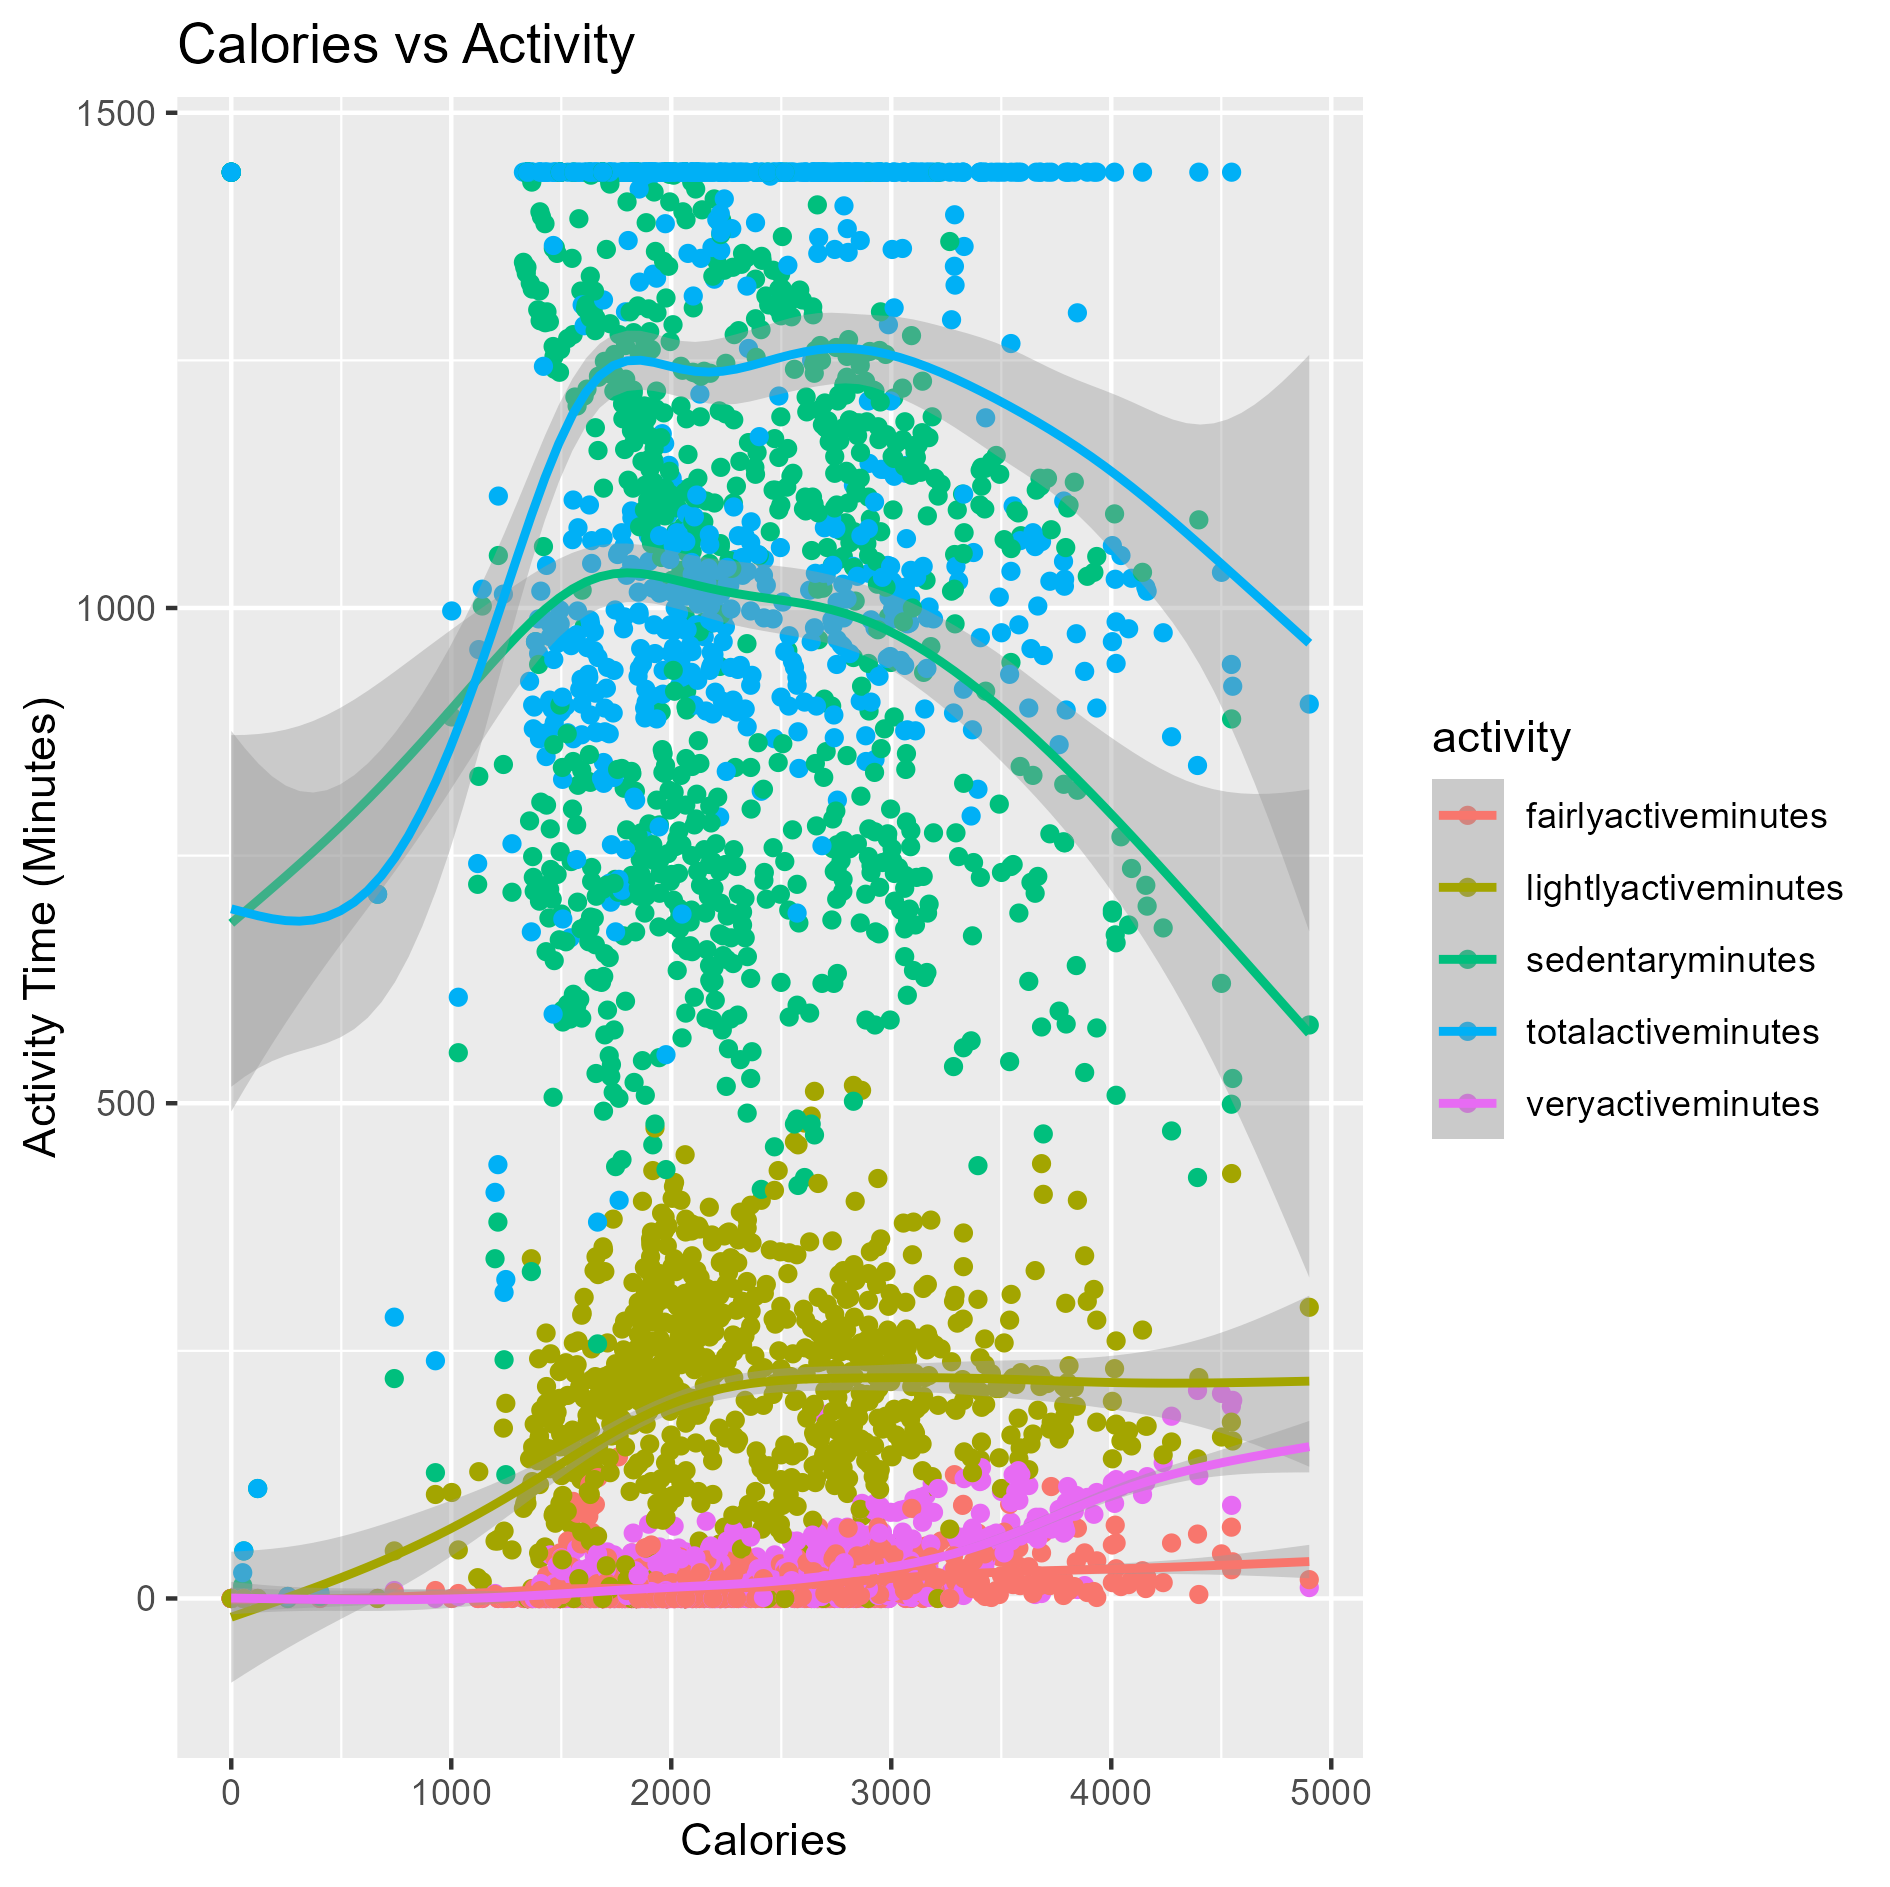

The more activity someone gets, the more calories that they burn. 

## Act

The business task of the case study was to identify trends in smart device usage that could be applied to Bellabeat customers and will guide marketing strategy.

I have a few suggestions for enhancing our analysis of smart device usage. 
* We should collect more data on the frequency at which the smart devices are used.
* We should analyze data specific to Bellabeat customers instead of public domain data.
* We should include data from more people in our analysis. The current sample size limits our analysis and conclusions that can be drawn.

 All this considered, my suggestions to the marketing team are as follows:
 * Consider that even light activity helps promote more calories to be burned. For buyers interested in weight loss, an alert to ensure they are hitting their daily goals could be helpful.
 * Refrain from marketing activities that promote the device's improvement in sleep. It seems that daily activity does not influence sleep behavior. 

I look forward to receiving additional data that can push this analysis further. 

